In [1]:
EXPERIMENT_NOTEBOOK_PATH = "../../reports/experiments/2019-02-04_01-40/notebook.csv"
EXPERIMENT_LOG_PATH = "../../reports/experiments/2019-02-04_01-40/run_bayesianopt.log"

In [2]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## Load

In [3]:
exp_df = pd.read_csv(EXPERIMENT_NOTEBOOK_PATH)
exp_df.head()

acc   loss  val_acc  val_loss  trial_no aug1_type  aug1_magnitude  \
0  0.110  2.310    0.174     2.288         1   dropout           0.844   
1  0.147  2.279    0.206     2.182         1   dropout           0.844   
2  0.187  2.205    0.322     2.136         1   dropout           0.844   
3  0.224  2.100    0.325     1.866         1   dropout           0.844   
4  0.265  2.020    0.342     1.818         1   dropout           0.844   

  aug2_type  aug2_magnitude aug3_type  aug3_magnitude  portion  sample_no  \
0    invert           0.847   dropout           0.384    0.298          1   
1    invert           0.847   dropout           0.384    0.298          1   
2    invert           0.847   dropout           0.384    0.298          1   
3    invert           0.847   dropout           0.384    0.298          1   
4    invert           0.847   dropout           0.384    0.298          1   

   mean_late_val_acc  
0              0.497  
1              0.497  
2              0.497  
3              0.497  
4              0.497

## Preprocess

### correct name of reward

In [4]:
exp_df.rename(columns={"mean_late_val_acc":"reward"}, inplace=True)
exp_df.head()

acc   loss  val_acc  val_loss  trial_no aug1_type  aug1_magnitude  \
0  0.110  2.310    0.174     2.288         1   dropout           0.844   
1  0.147  2.279    0.206     2.182         1   dropout           0.844   
2  0.187  2.205    0.322     2.136         1   dropout           0.844   
3  0.224  2.100    0.325     1.866         1   dropout           0.844   
4  0.265  2.020    0.342     1.818         1   dropout           0.844   

  aug2_type  aug2_magnitude aug3_type  aug3_magnitude  portion  sample_no  \
0    invert           0.847   dropout           0.384    0.298          1   
1    invert           0.847   dropout           0.384    0.298          1   
2    invert           0.847   dropout           0.384    0.298          1   
3    invert           0.847   dropout           0.384    0.298          1   
4    invert           0.847   dropout           0.384    0.298          1   

   reward  
0   0.497  
1   0.497  
2   0.497  
3   0.497  
4   0.497

### add epoch info and accuracy overfit

In [15]:
n_epochs = len(exp_df) / len(exp_df["trial_no"].unique()) / len(exp_df["sample_no"].unique())
exp_df["epoch"] = exp_df.index % n_epochs
exp_df["acc_overfit"] = exp_df["acc"] - exp_df["val_acc"]
exp_df.head()

acc   loss  val_acc  val_loss  trial_no aug1_type  aug1_magnitude  \
0  0.110  2.310    0.174     2.288         1   dropout           0.844   
1  0.147  2.279    0.206     2.182         1   dropout           0.844   
2  0.187  2.205    0.322     2.136         1   dropout           0.844   
3  0.224  2.100    0.325     1.866         1   dropout           0.844   
4  0.265  2.020    0.342     1.818         1   dropout           0.844   

  aug2_type  aug2_magnitude aug3_type  aug3_magnitude  portion  sample_no  \
0    invert           0.847   dropout           0.384    0.298          1   
1    invert           0.847   dropout           0.384    0.298          1   
2    invert           0.847   dropout           0.384    0.298          1   
3    invert           0.847   dropout           0.384    0.298          1   
4    invert           0.847   dropout           0.384    0.298          1   

   reward  epoch  acc_overfit  
0   0.497    0.0       -0.064  
1   0.497    1.0       -0.059  
2   0.497    2.0       -0.135  
3   0.497    3.0       -0.101  
4   0.497    4.0       -0.077

## Some info

In [10]:
print (f"number of trials:{exp_df.trial_no.unique().__len__()}")
print (f"number of samples for each trial:{exp_df.sample_no.unique().__len__()}")

number of trials:514
number of samples for each trial:3


In [11]:
color_palette = ["red","blue","chocolate","salmon","green","pink","orange",
                 "purple","magenta","sienna","teal","khaki","yellow","darkgreen",
                 "darkblue", "cyan","tan","yellowgreen","tomato","olive",
                 "navy","ivory","brown","azure", '#e6194b', '#3cb44b', '#ffe119', '#4363d8', 
                 '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', 
                 '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', 
                 '#000075', '#808080', '#ffffff', '#000000']*30

def plot_exp_lines(exp_df):
    
    #plt.figure(figsize=(20,10))
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,15))
    fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.0)
    
    rowList = []
    for trial_no in exp_df["trial_no"].unique():
        
        if trial_no<1:
            continue
        
        iter_df = exp_df[exp_df["trial_no"]==trial_no].copy()
        
        exp_color = color_palette[trial_no]
        
        if exp_df[exp_df["trial_no"]==trial_no]["portion"].values[0]==0.0:
            exp_color="black"
        
        mean_last_scores = []
        
        ############################################################
        # Accuracy plot
        ############################################################
        for sample_id in iter_df["sample_no"].unique():
            sample_df = iter_df[iter_df["sample_no"]==sample_id].copy()
            xs = np.arange(1,51,1)
            axes[0].plot(xs, sample_df["val_acc"], color=exp_color, alpha=0.5, linewidth=2)
            axes[0].plot(xs, sample_df["acc"], '--',color=exp_color, alpha=0.5, linewidth=1)
            
        axes[0].set_title("validation (straight) and train (dashed) accuracies for child model\n"+\
                  "(each color represents a distinct augmentation strategy) ", fontsize=20)
        axes[0].set_ylabel("accuracy", fontsize=20)
        
        ############################################################
        # Loss plot
        ############################################################
        for sample_id in iter_df["sample_no"].unique():
            sample_df = iter_df[iter_df["sample_no"]==sample_id].copy()
            xs = np.arange(1,51,1)
            axes[1].plot(xs, sample_df["val_loss"], color=exp_color, alpha=0.5, linewidth=2)
            axes[1].plot(xs, sample_df["loss"], '--',color=exp_color, alpha=0.5, linewidth=1)
            
        #axes[1].title("validation (straight) and train (dashed) accuracies for child model\n"+\
        #          "(each color represents a distinct augmentation strategy) ", fontsize=20)
        axes[1].set_xlabel("epochs", fontsize=20)
        axes[1].set_ylabel("loss", fontsize=20)
            
        param1 = iter_df["aug1_type"].values[0]
        param2 = iter_df["aug1_magnitude"].values[0]
        param3 = iter_df["aug2_type"].values[0]
        param4 = iter_df["aug2_magnitude"].values[0]
        param5 = iter_df["aug3_type"].values[0]
        param6 = iter_df["aug3_magnitude"].values[0]
        portion = iter_df["portion"].values[0]
        reward = iter_df["reward"].values[0]
        
        rowList.append([trial_no,param1,param2,param3,param4,param5,param6,portion,reward])
        
    ret_df = pd.DataFrame(rowList, columns=[
        "trial_no","aug1_type","aug1_magnitude", "aug2_type","aug2_magnitude","aug3_type","aug3_magnitude","portion", "reward"]) 
    return ret_df.sort_values("reward", ascending=False)

Total number of trials: 514


trial_no       aug1_type  aug1_magnitude    aug2_type  aug2_magnitude  \
48         49            crop           0.975  translate-y           0.818   
105       106            crop           0.967       rotate           0.871   
44         45             fog           0.978  translate-x           0.544   
142       143  gamma-contrast           0.966         crop           0.990   
32         33            crop           0.978          fog           0.603   
65         66        brighten           0.977          fog           0.708   
112       113          invert           0.962          fog           0.402   
92         93          emboss           0.968          fog           0.002   
51         52  coarse-dropout           0.973          fog           0.186   
108       109          clouds           0.956          fog           0.603   

          aug3_type  aug3_magnitude  portion  reward  
48    gaussian-blur           0.924    0.969   0.566  
105             fog           0.117    0.998   0.559  
44             crop           0.752    0.975   0.558  
142             fog           0.079    0.967   0.556  
32          sharpen           0.902    0.982   0.554  
65      translate-y           0.839    0.984   0.552  
112        brighten           0.159    0.971   0.552  
92   coarse-dropout           0.740    0.973   0.551  
51   gamma-contrast           0.163    0.976   0.551  
108             fog           0.268    0.995   0.550

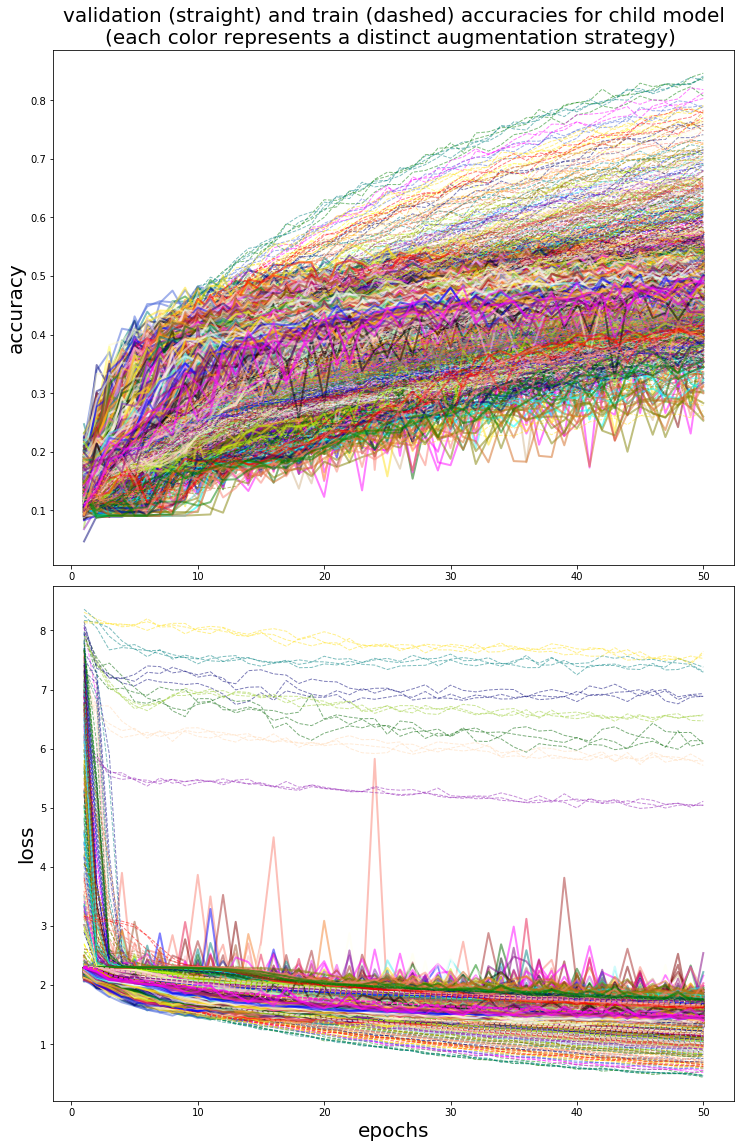

In [13]:
score_df = plot_exp_lines(exp_df)
print (f"Total number of trials: {exp_df.trial_no.unique().__len__()}")
score_df[:10]

## Rewards are increasing by iteration. Good news!

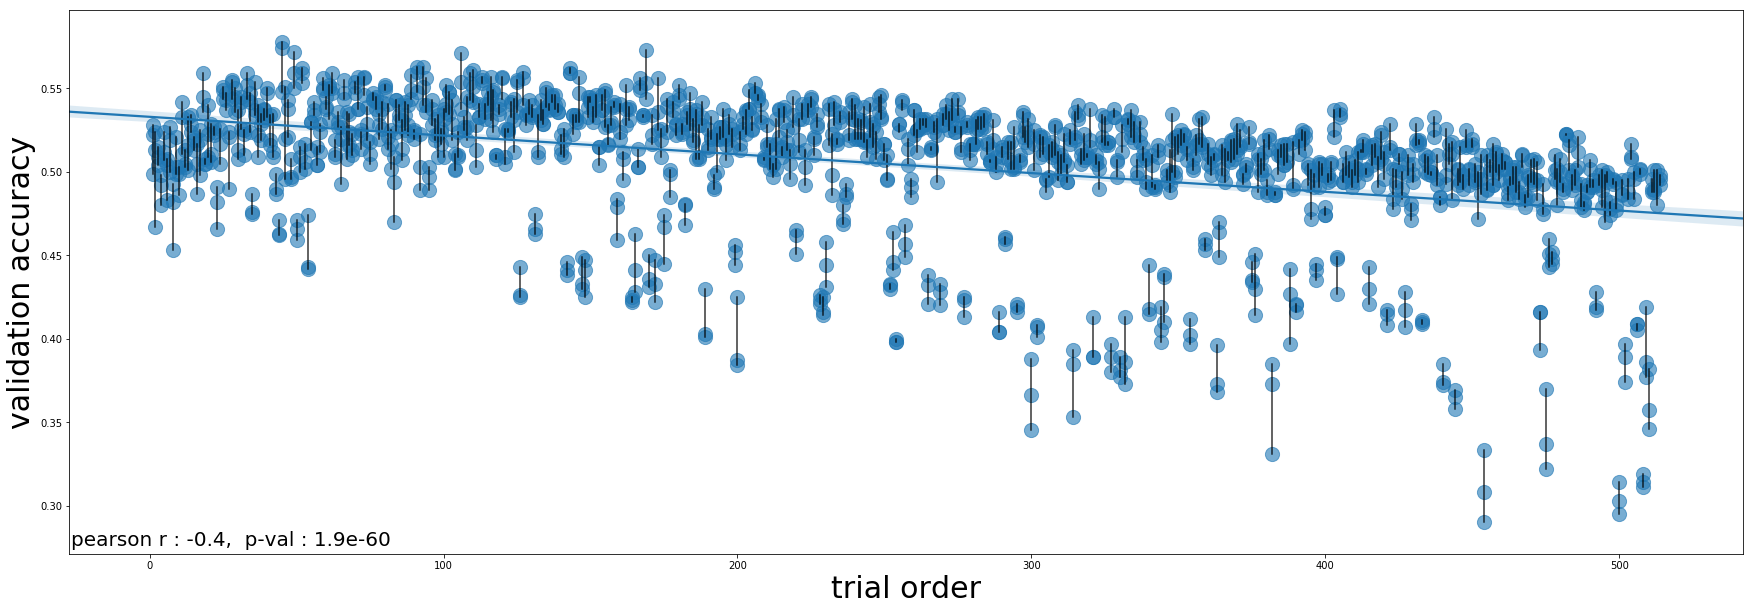

In [21]:
import seaborn as sns

df = (exp_df[exp_df["acc_overfit"]<0.05]
     .sort_values("val_acc", ascending=False)
     .drop_duplicates(["trial_no","sample_no"])
)[["trial_no","val_acc"]]

plt.figure(figsize=(30,10))
for trial_no in df["trial_no"].unique():
    val_accs = df[df["trial_no"]==trial_no]["val_acc"].values
    plt.plot([trial_no, trial_no],[min(val_accs), max(val_accs)], color='black', alpha=0.8)

ax = sns.regplot(x="trial_no", y="val_acc", data=df, scatter_kws={'s':200,'alpha':0.6})

from scipy.stats import pearsonr
r , p = pearsonr(df["trial_no"].values,df["val_acc"].values)

plt.text(plt.xlim()[0]+0.5,plt.ylim()[0]+0.005, f"pearson r : {r:.2},  p-val : {p:.2}", fontsize=20)

plt.xlabel("trial order", fontsize=30)
plt.ylabel("validation accuracy", fontsize=30)

del df

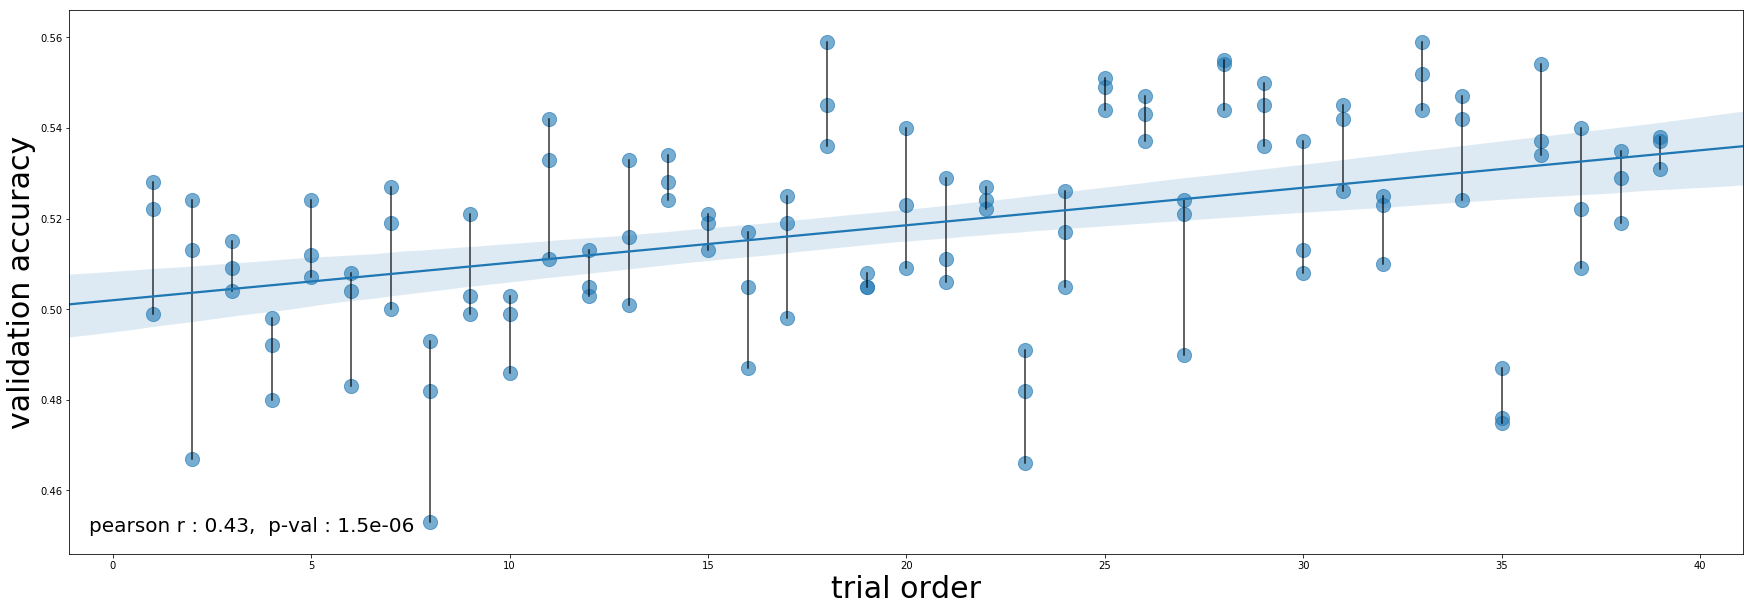

In [53]:
df = (exp_df[(exp_df["acc_overfit"]<0.05) & (exp_df["trial_no"]<40)]
     .sort_values("val_acc", ascending=False)
     .drop_duplicates(["trial_no","sample_no"])
)[["trial_no","val_acc"]]

plt.figure(figsize=(30,10))
for trial_no in df["trial_no"].unique():
    val_accs = df[df["trial_no"]==trial_no]["val_acc"].values
    plt.plot([trial_no, trial_no],[min(val_accs), max(val_accs)], color='black', alpha=0.8)

ax = sns.regplot(x="trial_no", y="val_acc", data=df, scatter_kws={'s':200,'alpha':0.6})

from scipy.stats import pearsonr
r , p = pearsonr(df["trial_no"].values,df["val_acc"].values)

plt.text(plt.xlim()[0]+0.5,plt.ylim()[0]+0.005, f"pearson r : {r:.2},  p-val : {p:.2}", fontsize=20)

plt.xlabel("trial order", fontsize=30)
plt.ylabel("validation accuracy", fontsize=30)

del df

## How frequency of augmented images affect accuracy?

Text(0, 0.5, 'val_acc')

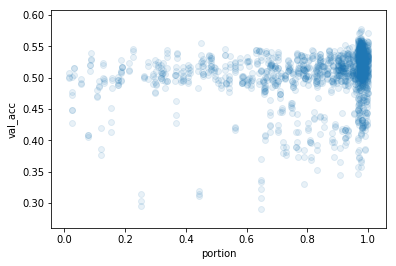

In [50]:
df = (exp_df[exp_df["acc_overfit"]<0.05]
         .sort_values("val_acc", ascending=False)
         .drop_duplicates(["trial_no","sample_no"])
     )[["portion","val_acc"]]

plt.scatter(df["portion"], df["val_acc"], alpha=0.1)
plt.xlabel("portion")
plt.ylabel("val_acc")

In [23]:
exp_df.drop_duplicates("trial_no")["portion"].unique().__len__()

253

# Top 5 policy accuracy curves (they're overfitting for augmentation)

trial_no       aug1_type  aug1_magnitude    aug2_type  aug2_magnitude  \
2        49            crop           0.975  translate-y           0.818   
3       106            crop           0.967       rotate           0.871   
1        45             fog           0.978  translate-x           0.544   
4       143  gamma-contrast           0.966         crop           0.990   
0        33            crop           0.978          fog           0.603   

       aug3_type  aug3_magnitude  portion  reward  
2  gaussian-blur           0.924    0.969   0.566  
3            fog           0.117    0.998   0.559  
1           crop           0.752    0.975   0.558  
4            fog           0.079    0.967   0.556  
0        sharpen           0.902    0.982   0.554

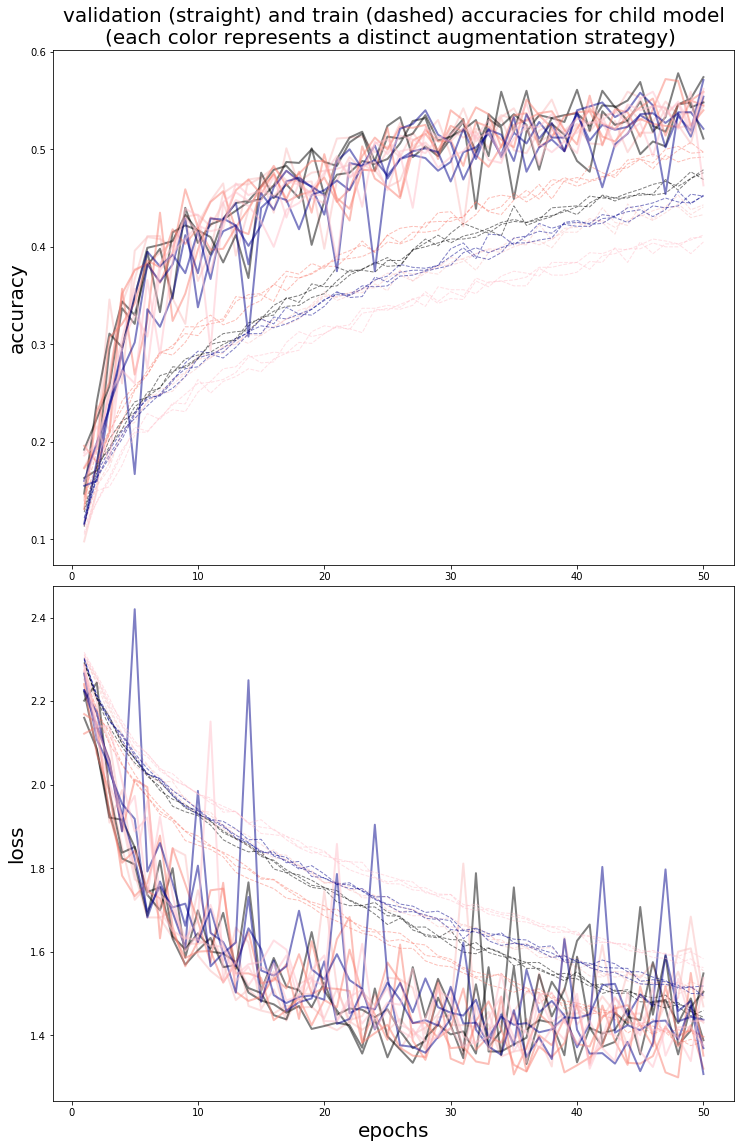

In [24]:
top_policy_trial_no_arr = score_df[:5].trial_no.values
plot_exp_lines(exp_df[exp_df["trial_no"].isin(top_policy_trial_no_arr)])

# Bottom 5 policy accuracy curves

trial_no       aug1_type  aug1_magnitude       aug2_type  aug2_magnitude  \
0       314  gamma-contrast           0.986     translate-x           0.723   
2       475     translate-y           0.973  gamma-contrast           0.956   
4       508     translate-y           0.174  gamma-contrast           0.990   
3       500     translate-y           0.942  gamma-contrast           0.977   
1       454     translate-y           0.993  gamma-contrast           0.954   

     aug3_type  aug3_magnitude  portion  reward  
0       rotate           0.810    0.831   0.348  
2  translate-x           0.849    0.648   0.334  
4  translate-y           0.859    0.444   0.306  
3  translate-x           0.710    0.252   0.299  
1  translate-x           0.836    0.649   0.281

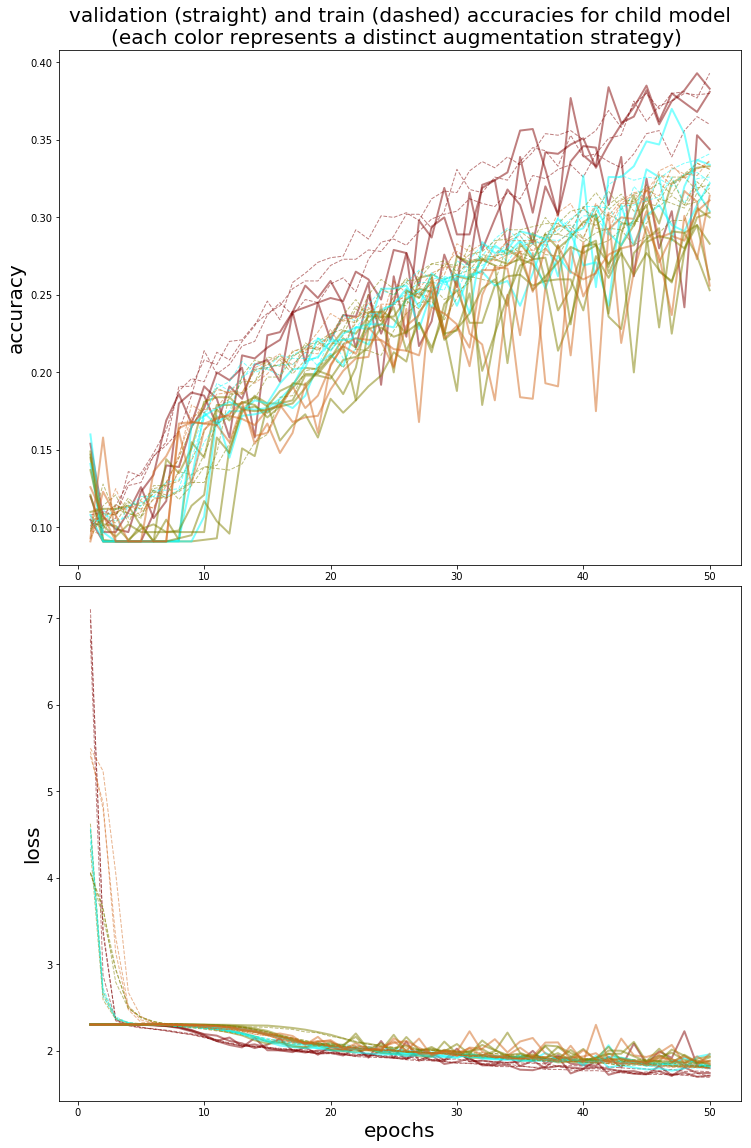

In [25]:
worst_policy_trial_no_arr = score_df[-5:].trial_no.values
plot_exp_lines(exp_df[exp_df["trial_no"].isin(worst_policy_trial_no_arr)])

In [26]:
import sys
sys.path.insert(0,"../../")

from deepaugmenter.augmenter import Augmenter
augmenter=Augmenter()

In [27]:
from PIL import Image

from imgaug import augmenters as iaa

import sys
sys.path.insert(0,"../../")
from deepaugmenter.build_features import DataOp

Using TensorFlow backend.


In [29]:
data, input_shape = DataOp.load("cifar10",1000)
data = DataOp.preprocess(data)

In [30]:
def display_images(X, nrows=2, ncols=4):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10,nrows*10))
    fig.tight_layout()

    for i,im_arr in enumerate(X[:(nrows*ncols)]):
        axes[int(i/ncols)][i%ncols].imshow(im_arr)
        
def display_images_comperatively(X,X_aug,nrows=2, ncols=4):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10,nrows*10))
    fig.tight_layout()

    for i,im_arr in enumerate(X[:(nrows*ncols)]):
        if i%2==0:
            axes[int(i/ncols)][i%ncols].imshow(X[i])
            axes[int((i+1)/ncols)][(i+1)%ncols].imshow(X_aug[i])

            
def display_augmentation_by_trial_no(trial_no, exp_df, data, nrows=2, ncols=4):
    trial_df = exp_df[exp_df["trial_no"]==trial_no]
    trial_hyperparams = [trial_df.iloc[0,5],trial_df.iloc[0,6],
                         trial_df.iloc[0,7],trial_df.iloc[0,8],
                         trial_df.iloc[0,9],trial_df.iloc[0,10],
                         1.0] # proportion always 1

    aug_data = augmenter.run(data["X_train"], data["y_train"],*trial_hyperparams)

    print (trial_hyperparams)
    display_images_comperatively(data["X_train"], aug_data["X_train"], nrows, ncols)

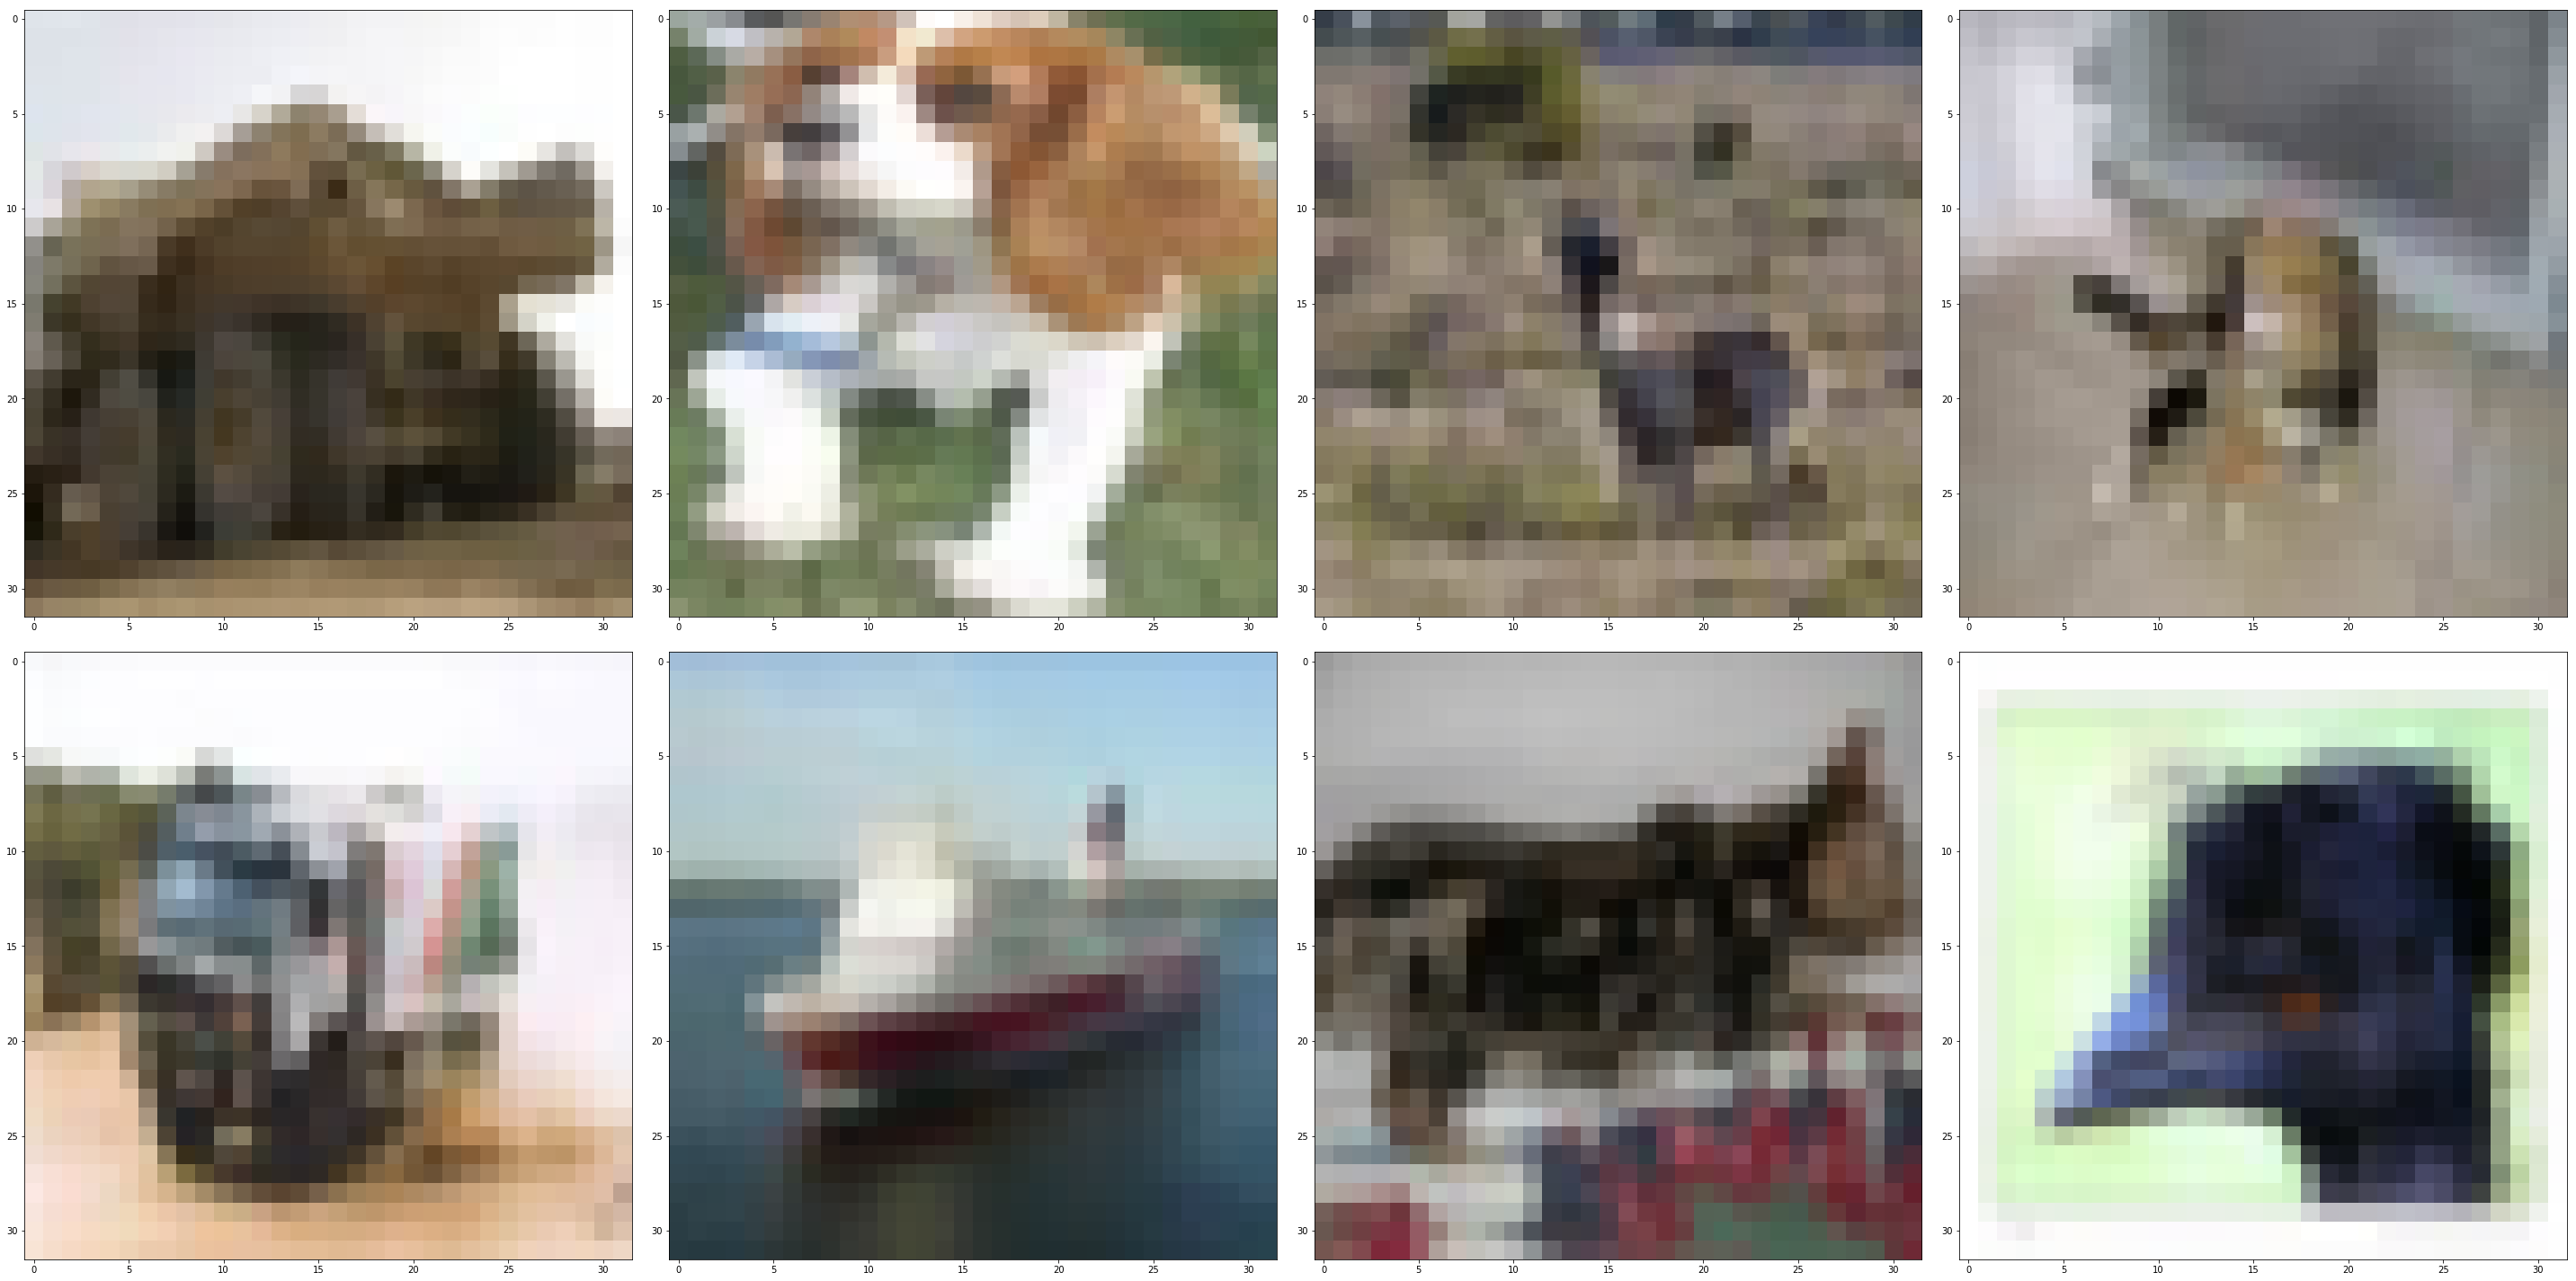

In [31]:
display_images(data["X_train"])

['gaussian-blur', 0.474, 'rotate', 0.737, 'shear', 0.135, 1.0]


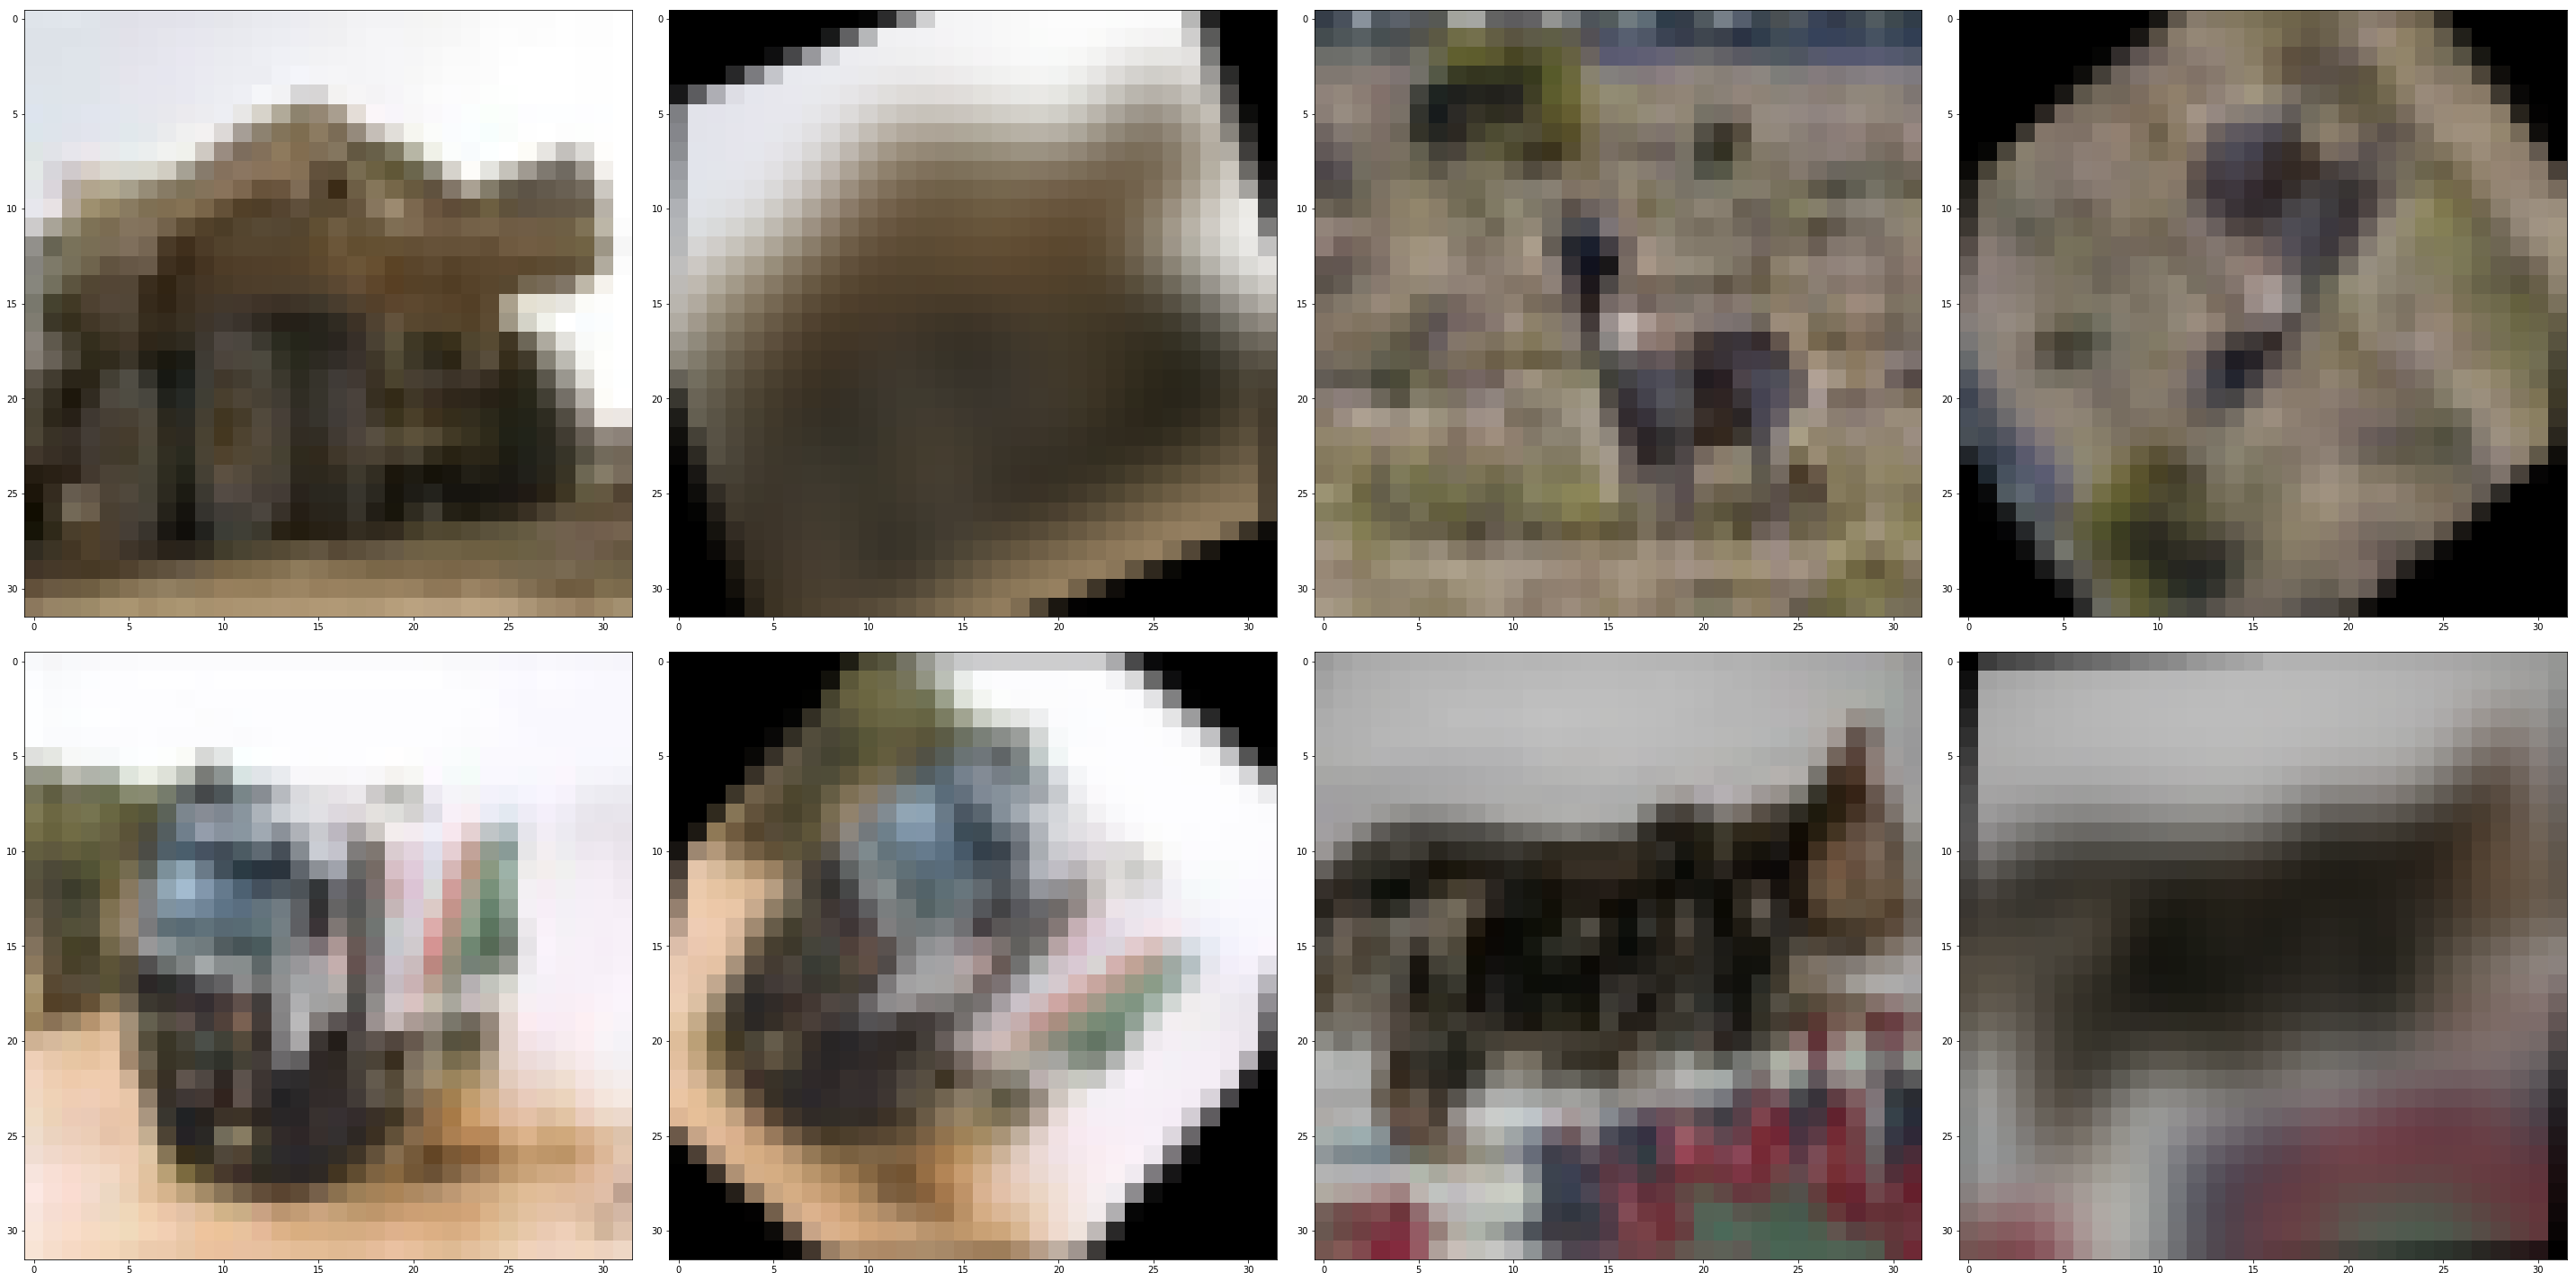

In [32]:
display_augmentation_by_trial_no(5, exp_df, data)

In [33]:
top_policy_trial_no_arr

array([ 49, 106,  45, 143,  33])

# Overfitting augmentations

49
['crop', 0.975, 'translate-y', 0.818, 'gaussian-blur', 0.924, 1.0]
106
['crop', 0.9670000000000001, 'rotate', 0.871, 'fog', 0.11699999999999999, 1.0]
45
['fog', 0.978, 'translate-x', 0.544, 'crop', 0.752, 1.0]
143
['gamma-contrast', 0.966, 'crop', 0.99, 'fog', 0.079, 1.0]
33
['crop', 0.978, 'fog', 0.603, 'sharpen', 0.902, 1.0]


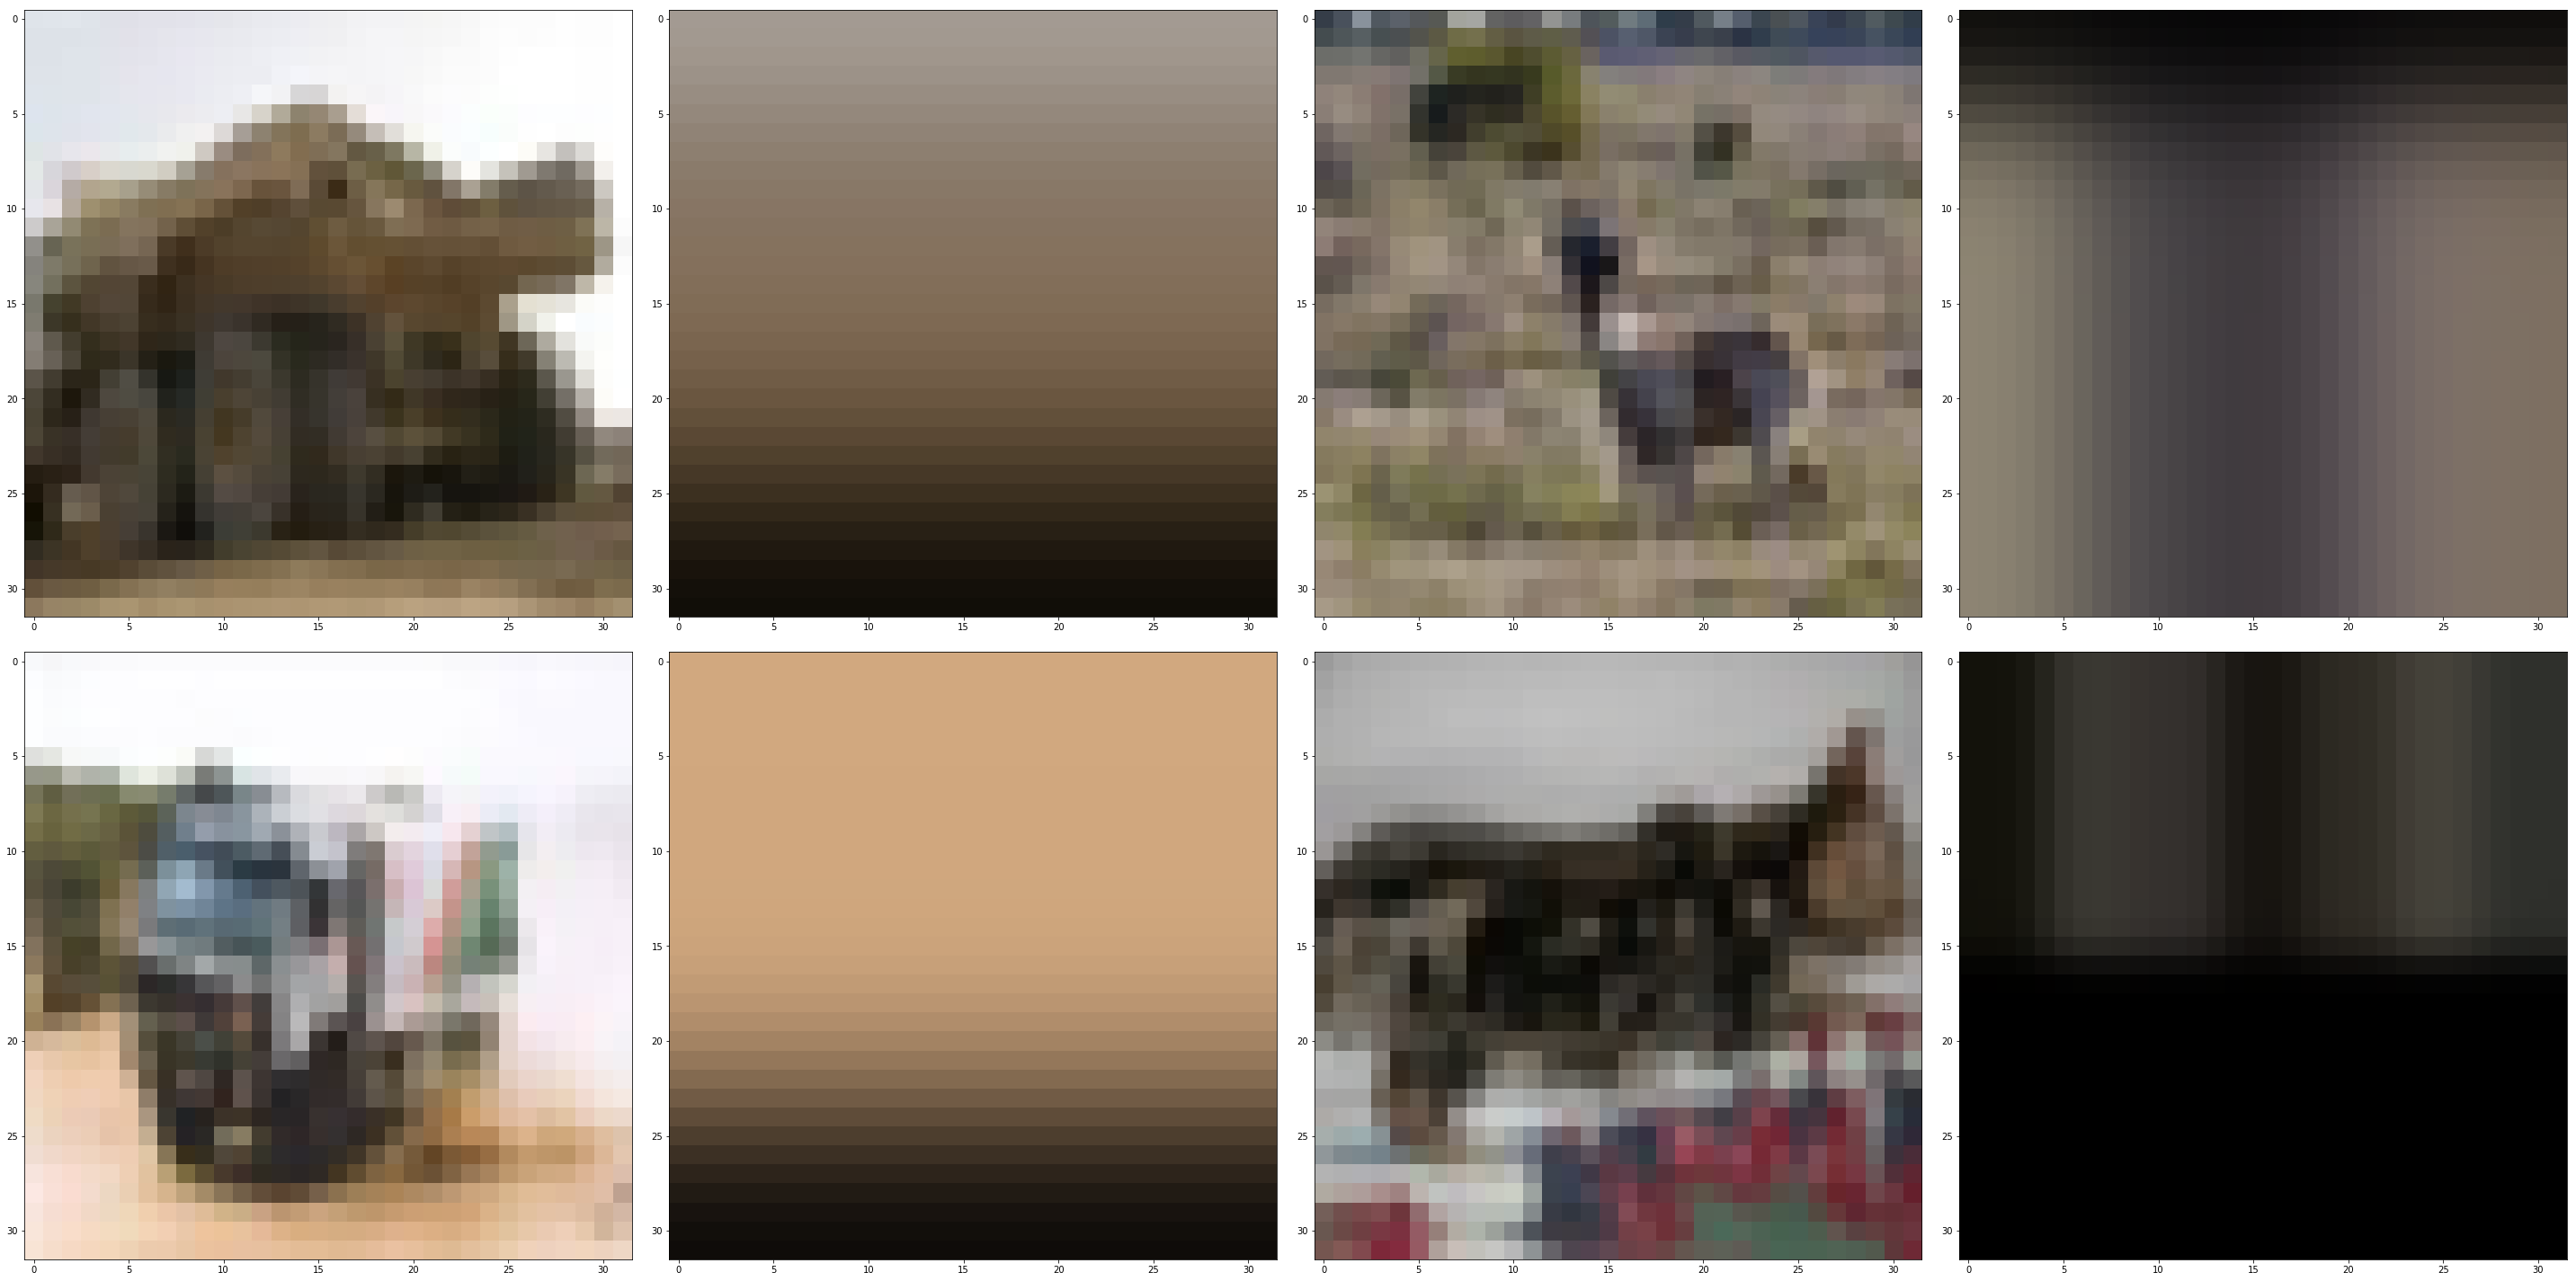

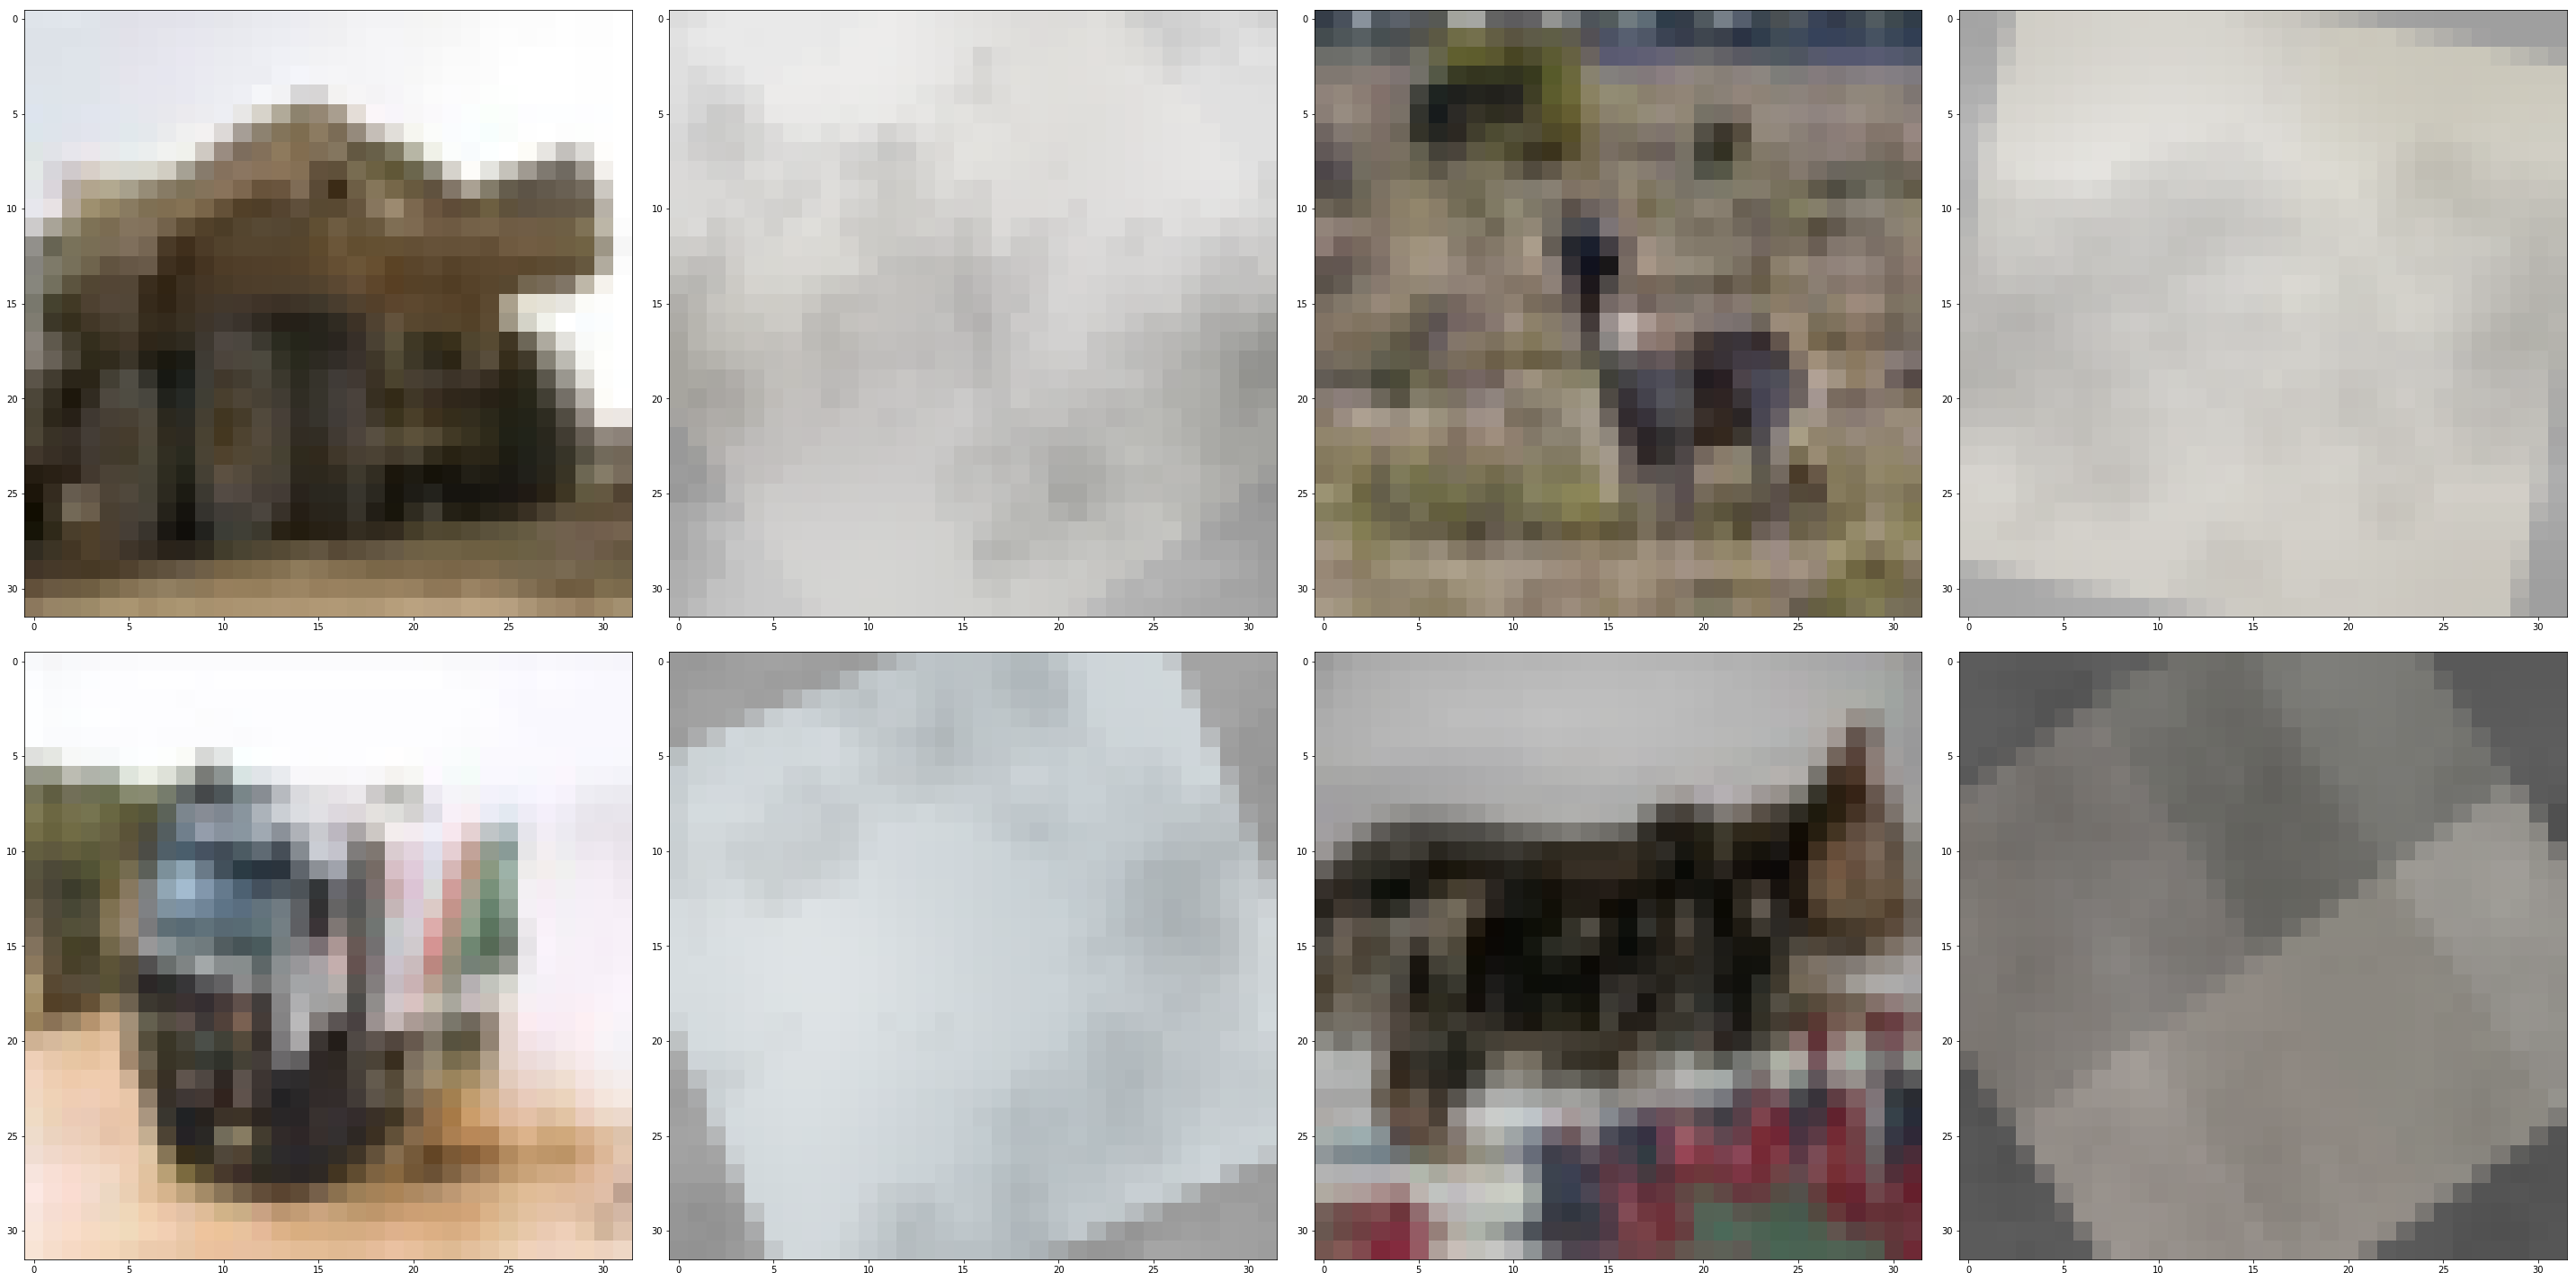

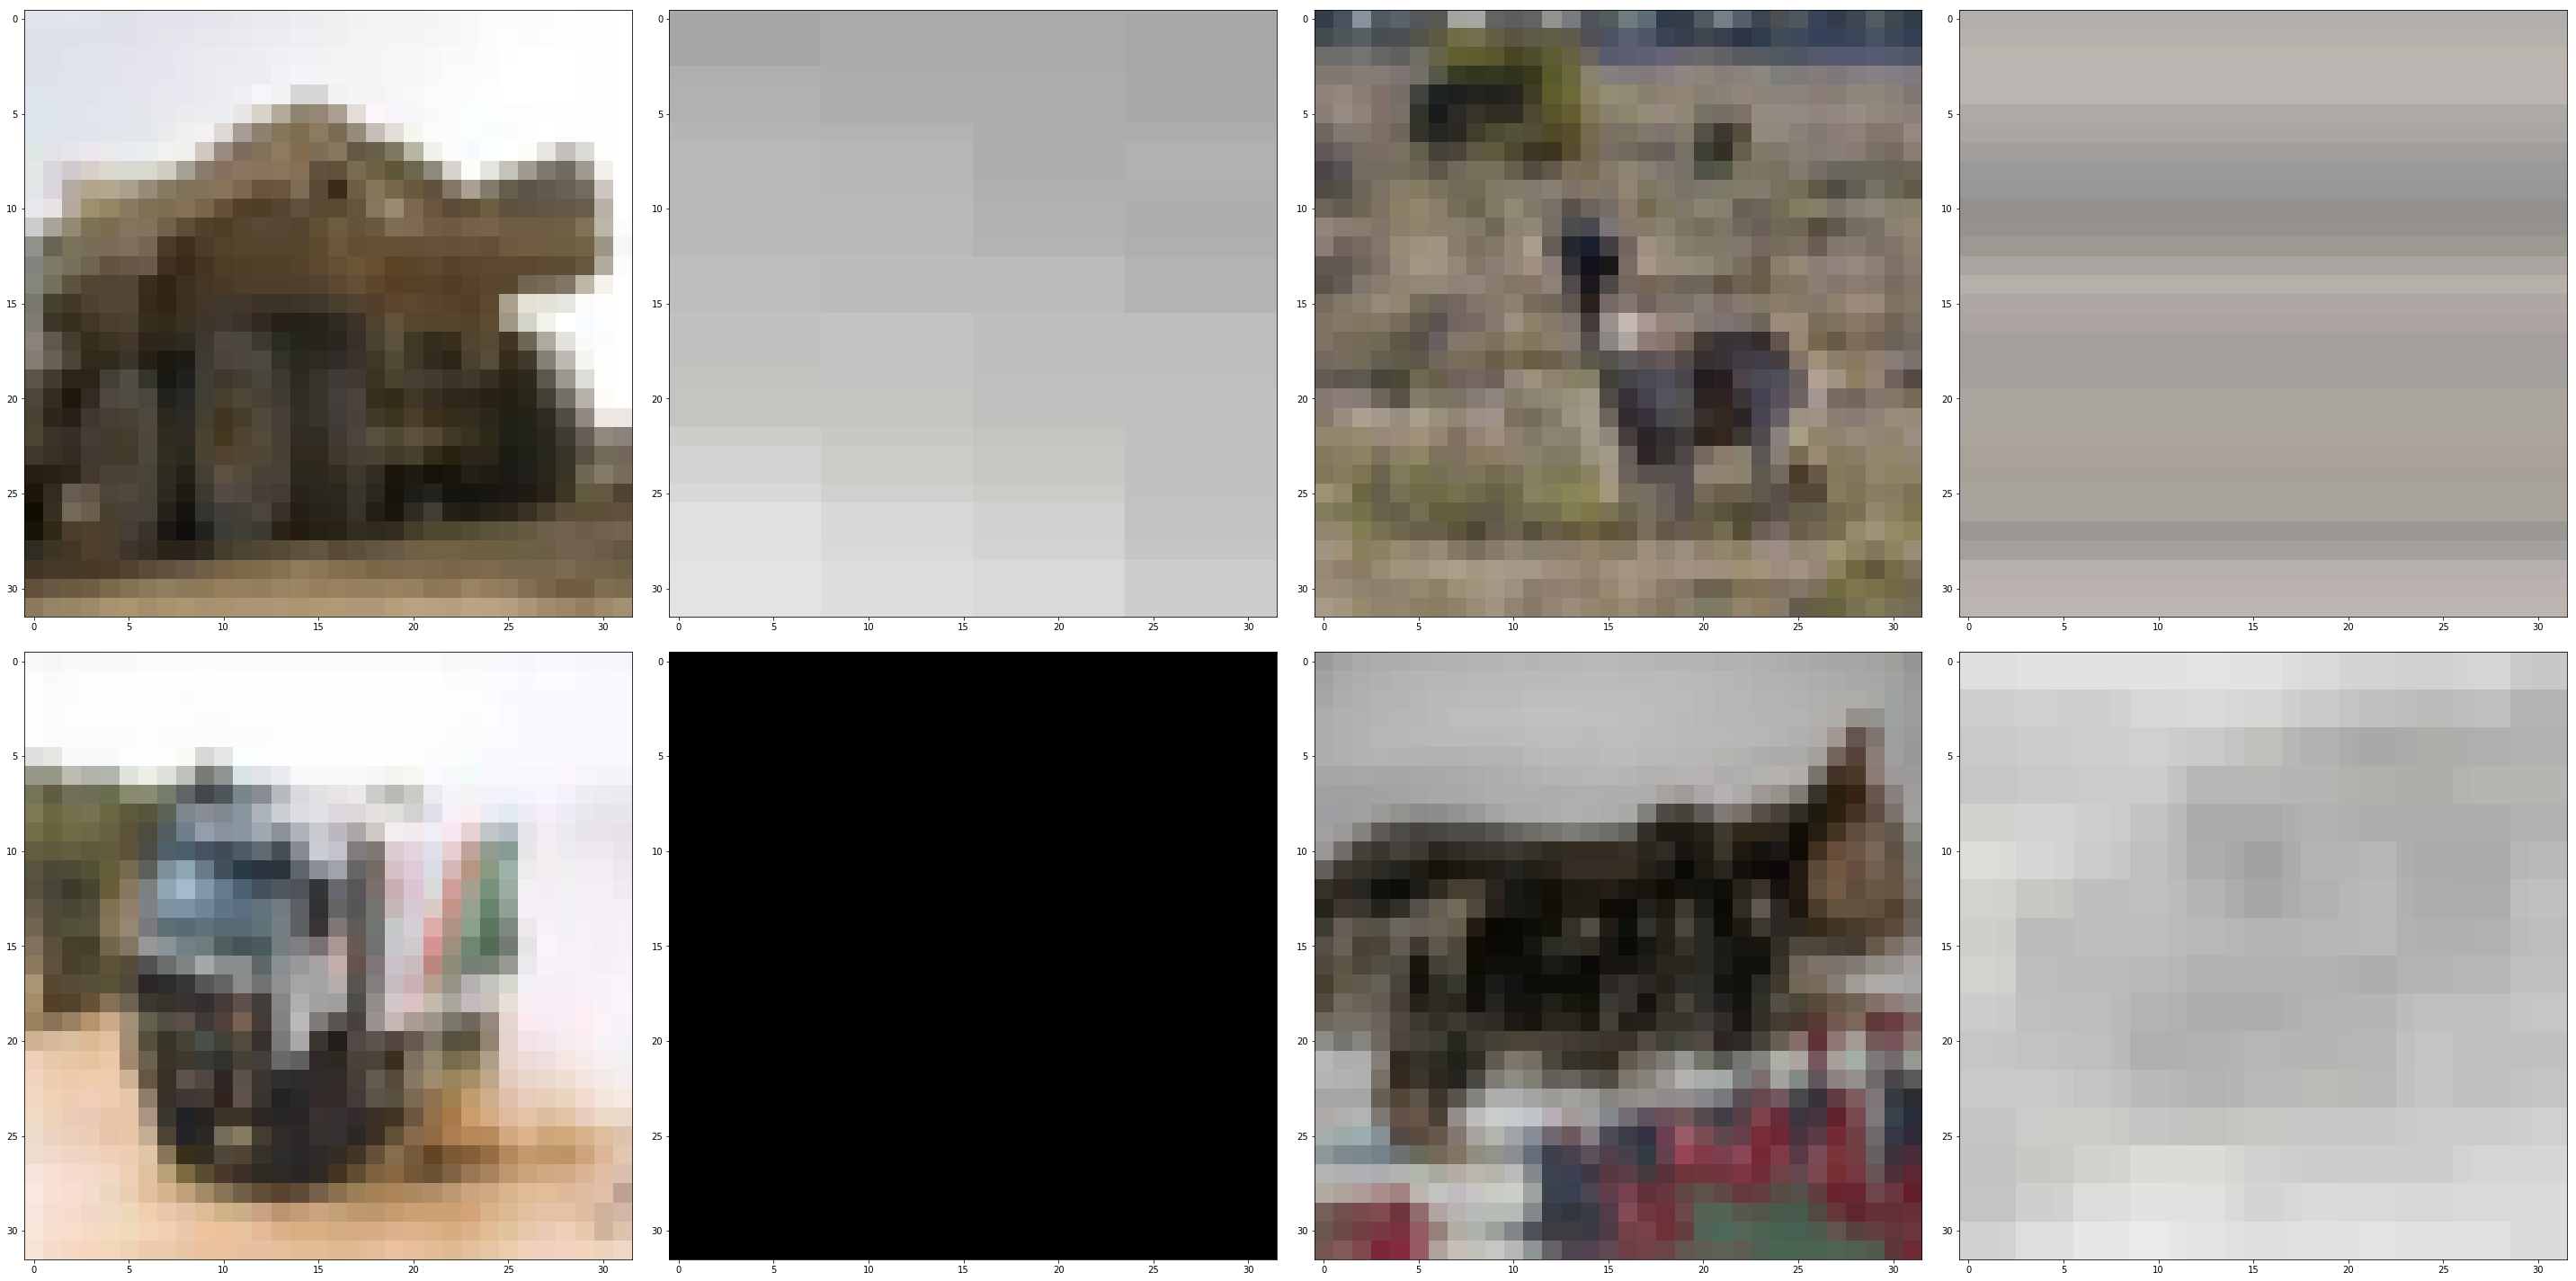

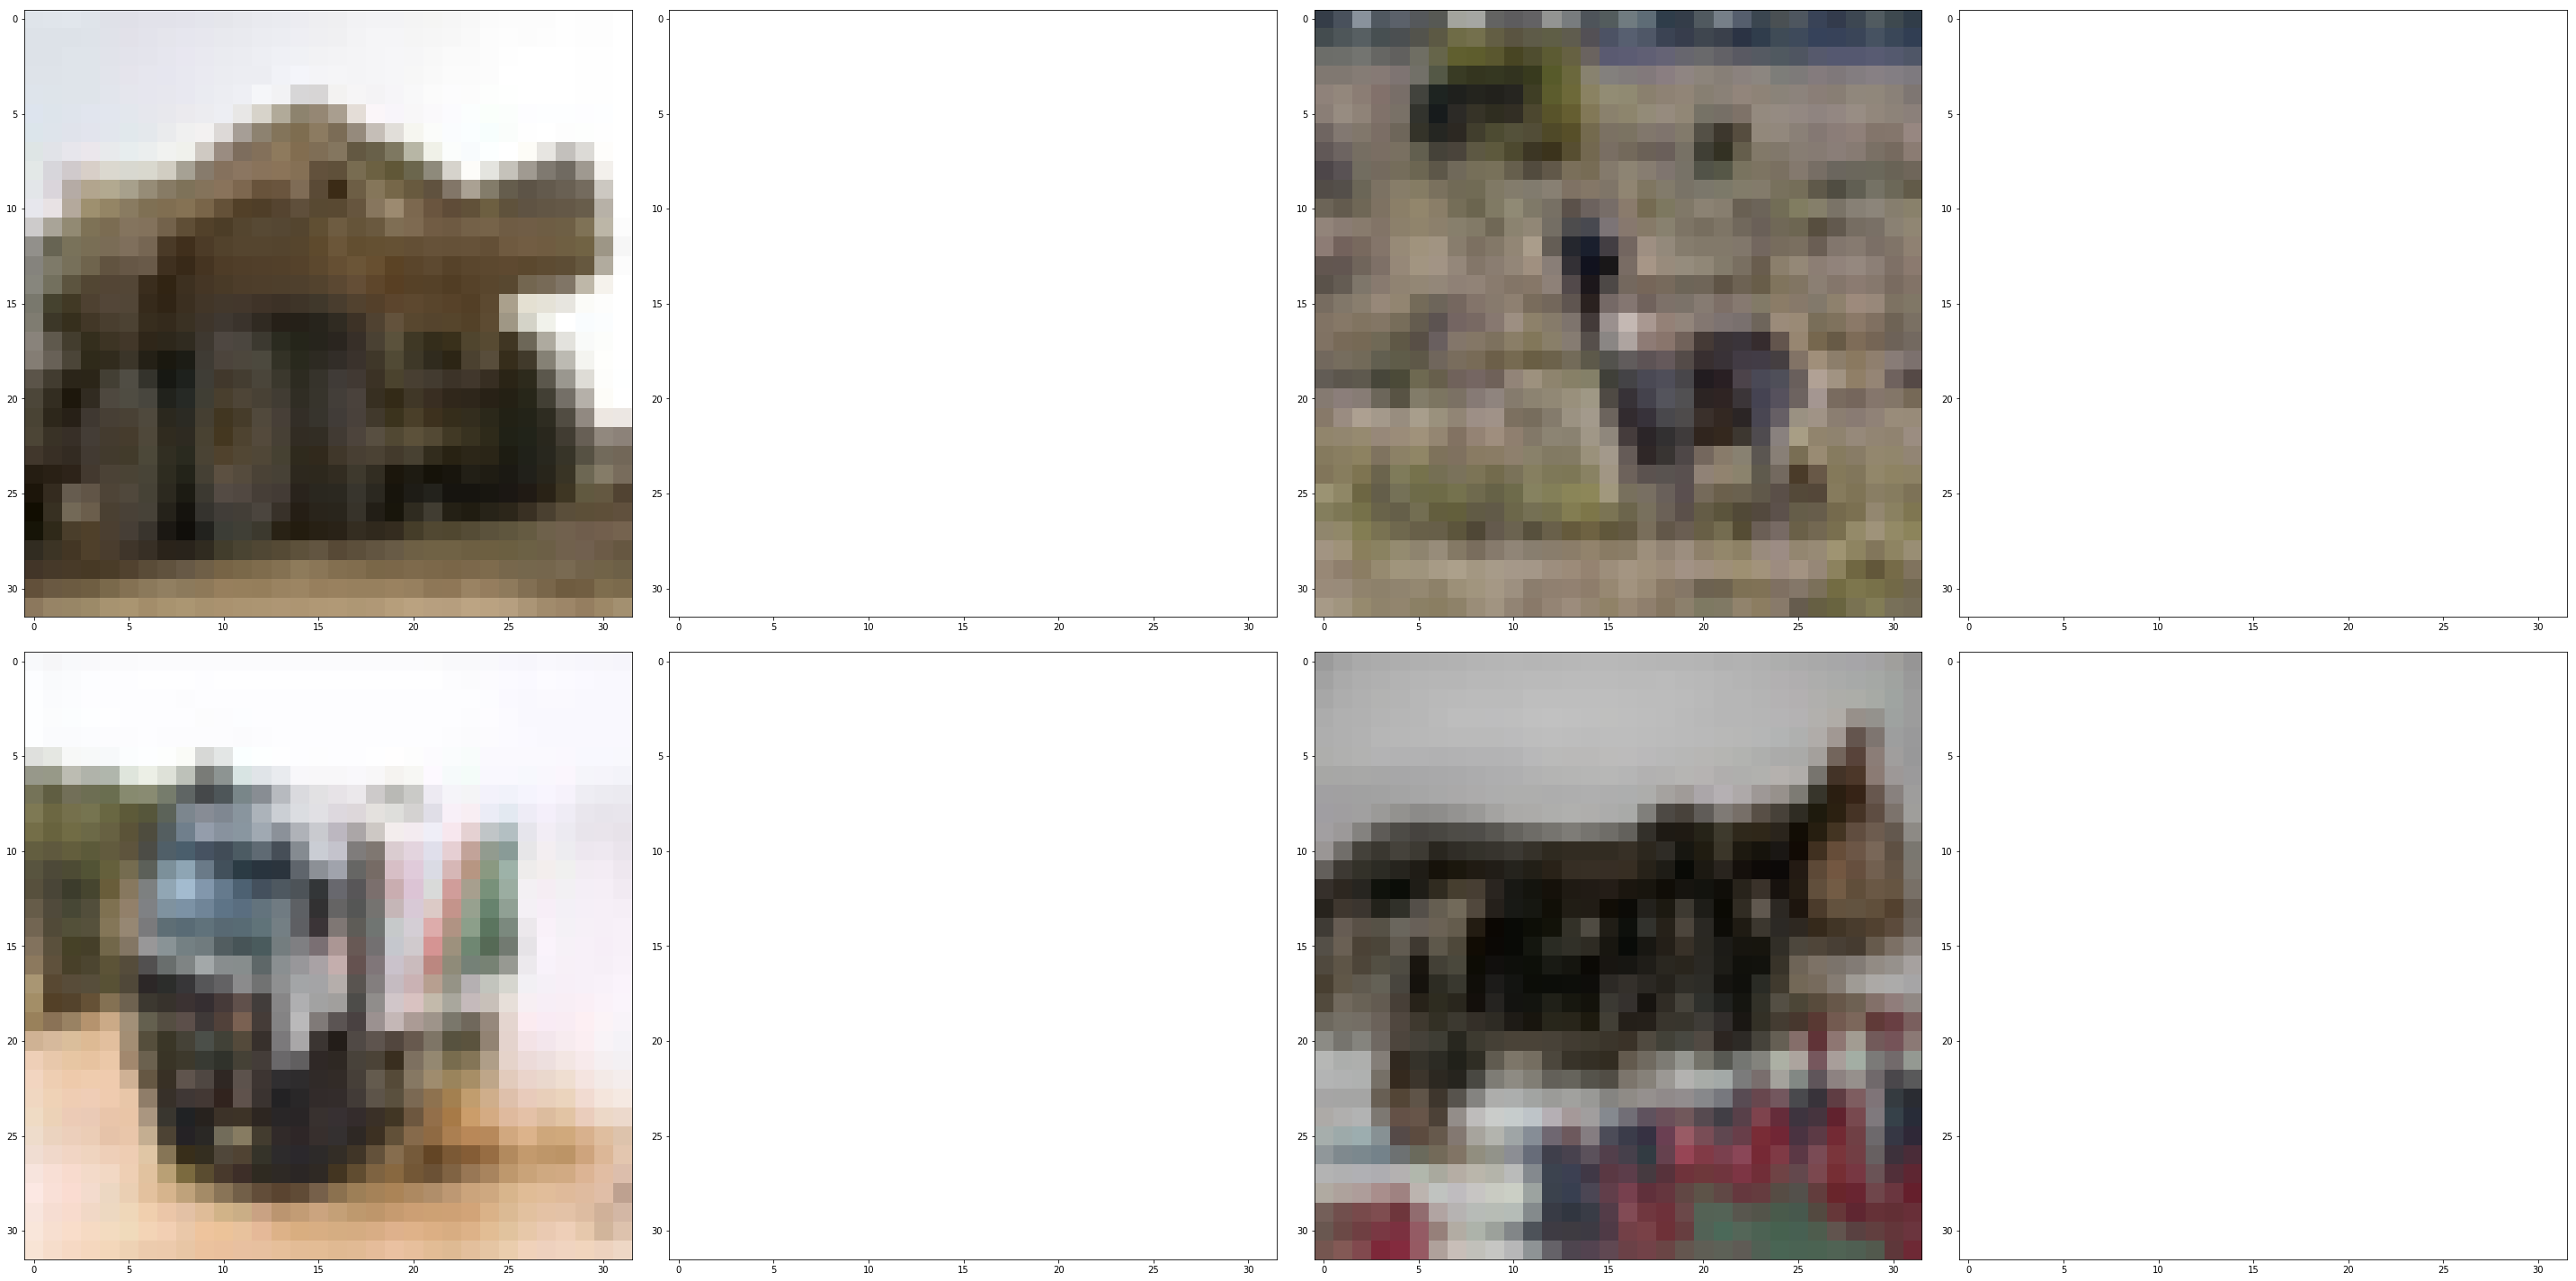

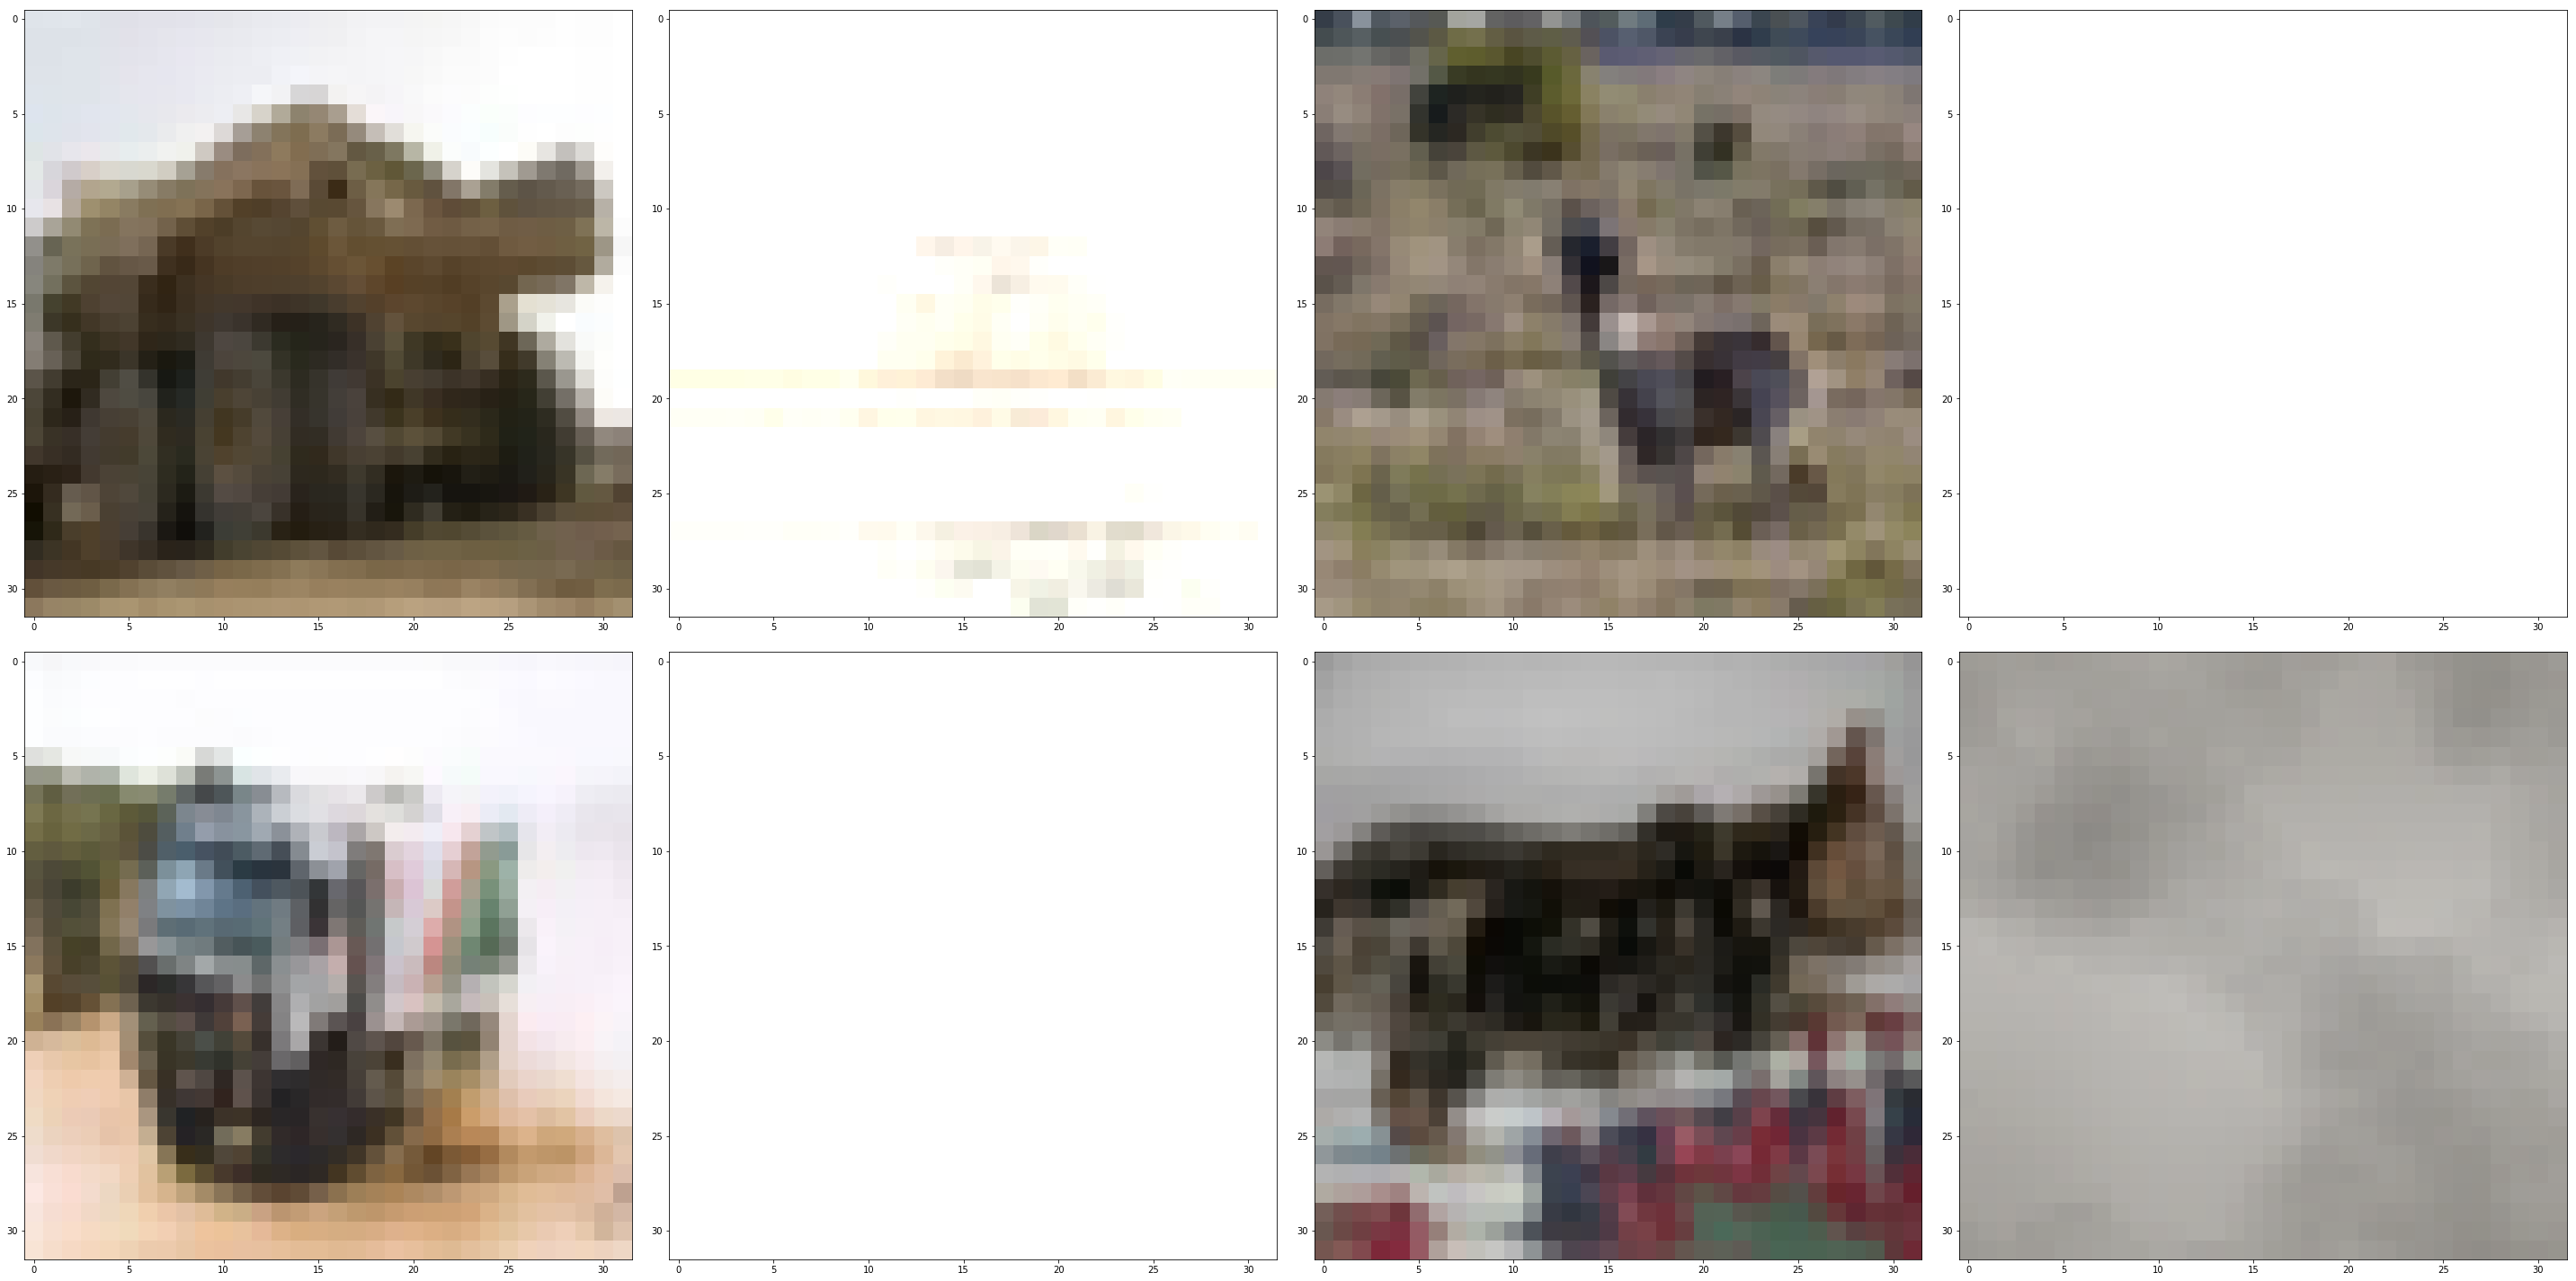

In [34]:
for i in top_policy_trial_no_arr:
    print (i)
    display_augmentation_by_trial_no(i, exp_df, data)

# Non-overfitting augmentations

In [45]:
acc_overfit_by_trial = exp_df[exp_df["epoch"]<35].groupby("trial_no").sum()["acc_overfit"]

# if acc_overfit is negative, that means validation is more accurate than training, so augmentation overfits
modified_exp_df = pd.merge(
    exp_df, 
    pd.DataFrame(acc_overfit_by_trial).reset_index().rename(columns={"acc_overfit":"total_acc_overfit"}),
    on="trial_no",
    how="left"
)

non_overfitting_exp_df = modified_exp_df[modified_exp_df["total_acc_overfit"]>0]

trial_no: 186
['gamma-contrast', 0.981, 'sharpen', 0.619, 'clouds', 0.598, 1.0]
trial_no: 34
['emboss', 0.986, 'clouds', 0.583, 'sharpen', 0.513, 1.0]
trial_no: 405
['gamma-contrast', 0.47, 'gamma-contrast', 0.7, 'translate-x', 0.37200000000000005, 1.0]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


trial_no: 22
['crop', 0.99, 'coarse-dropout', 0.248, 'clouds', 0.708, 1.0]
trial_no: 21
['sharpen', 0.972, 'coarse-dropout', 0.19699999999999998, 'clouds', 0.76, 1.0]


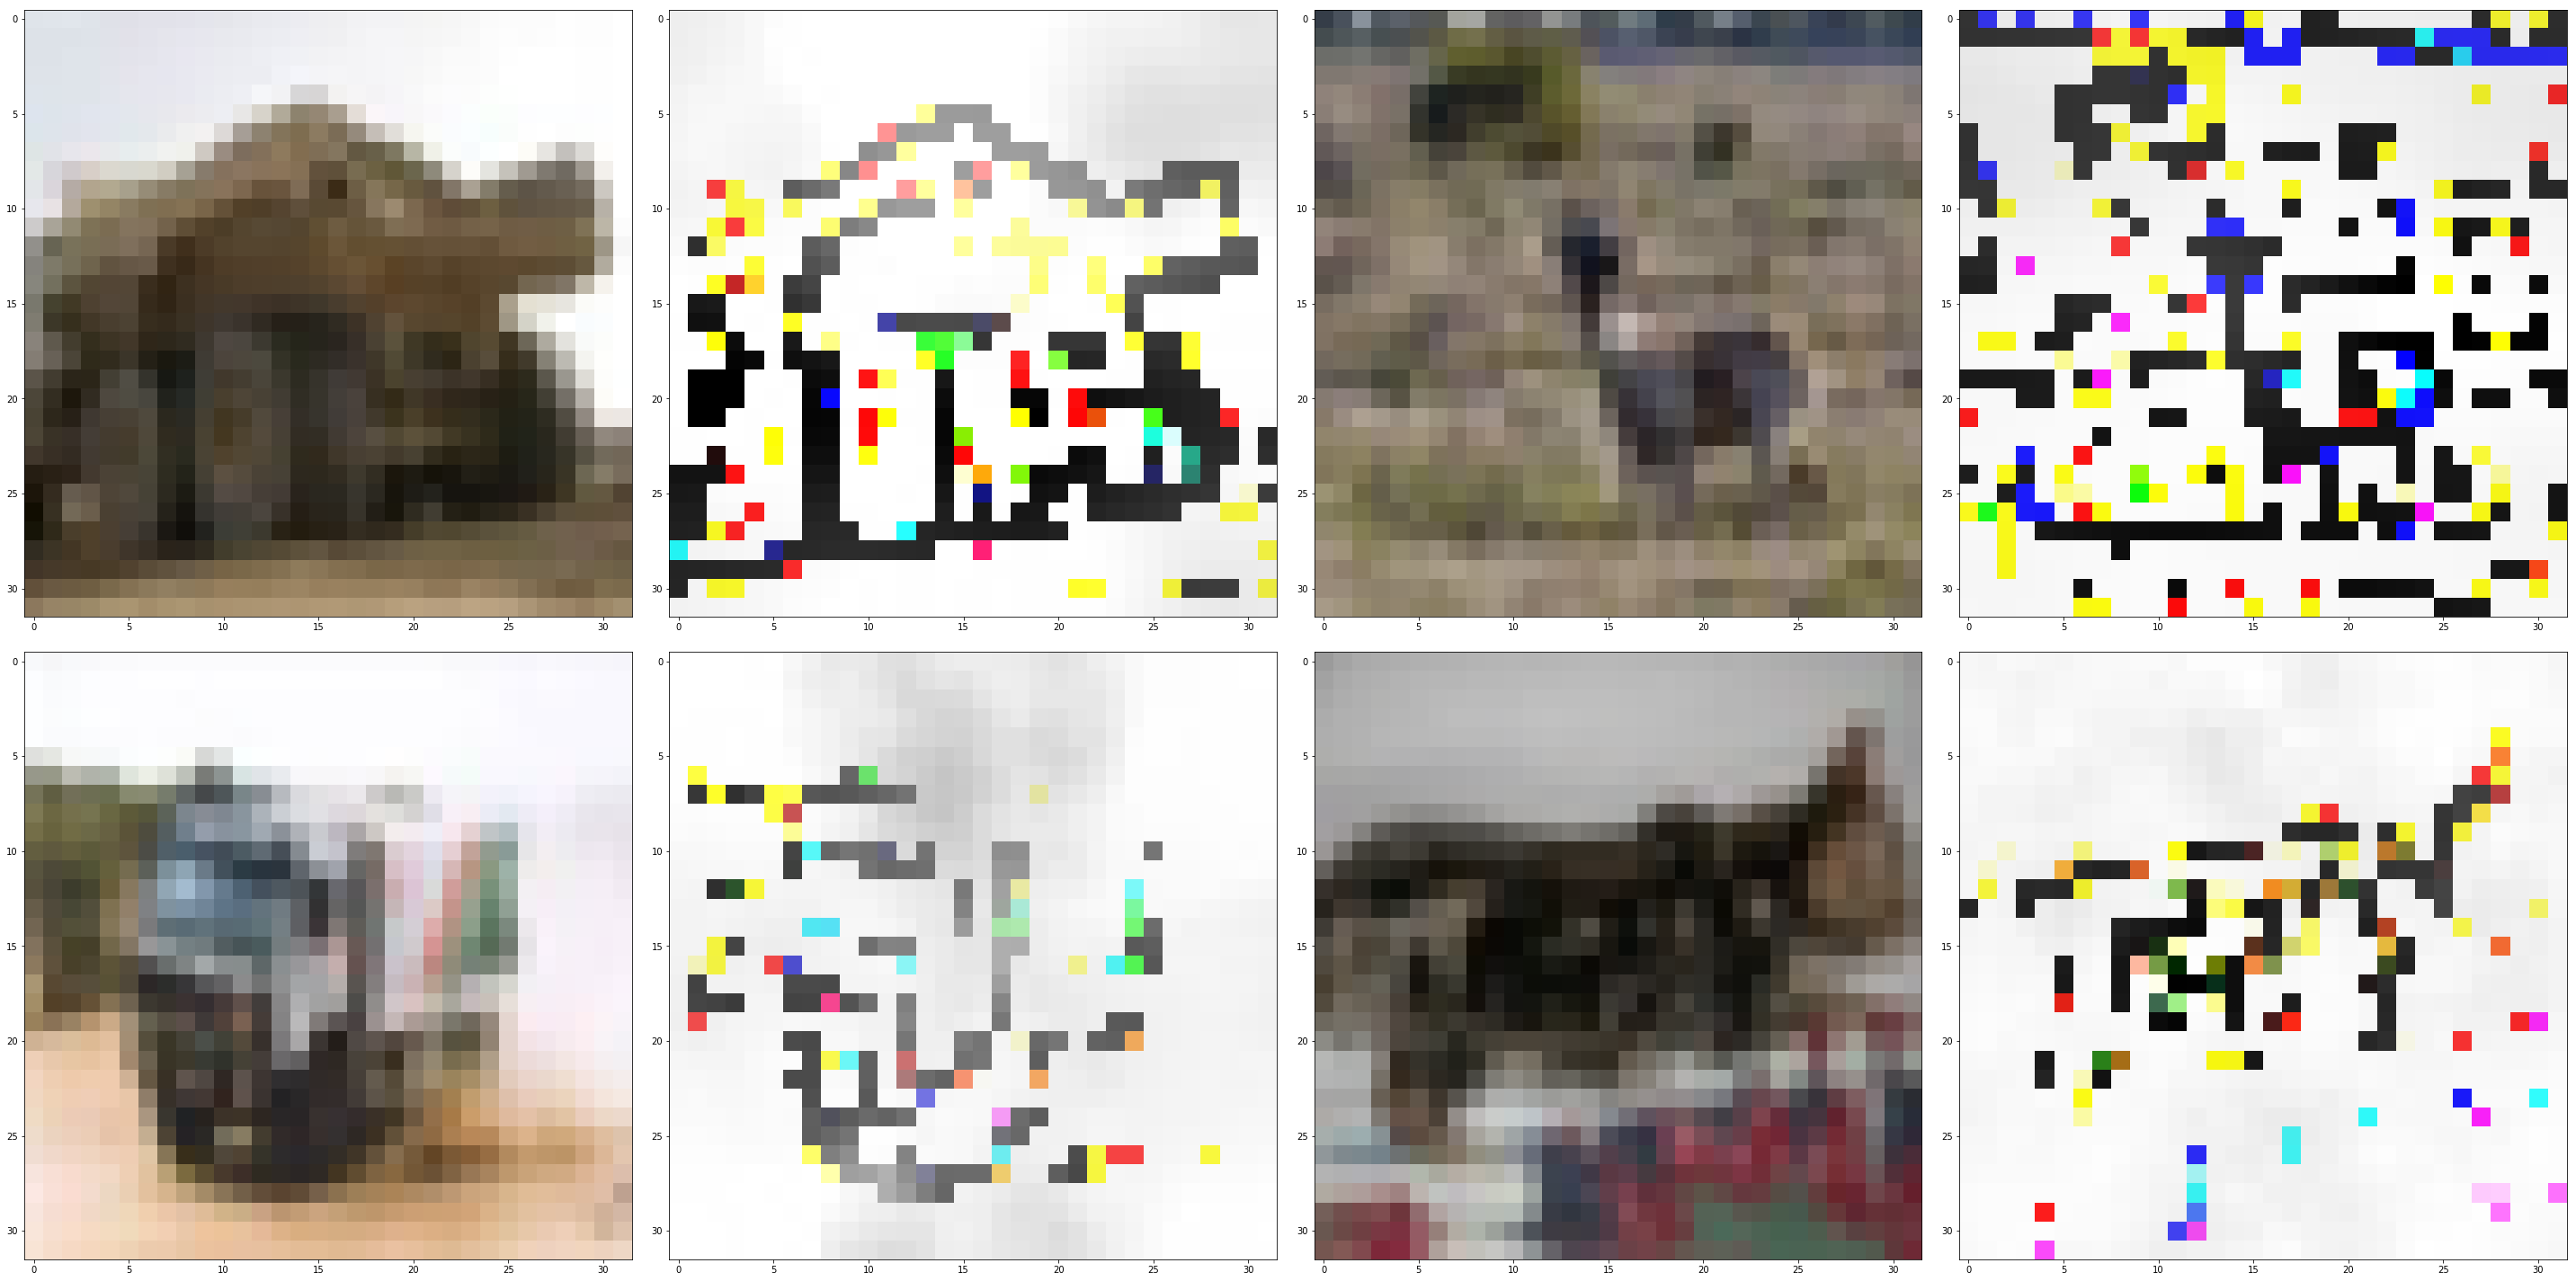

<Figure size 144x144 with 0 Axes>

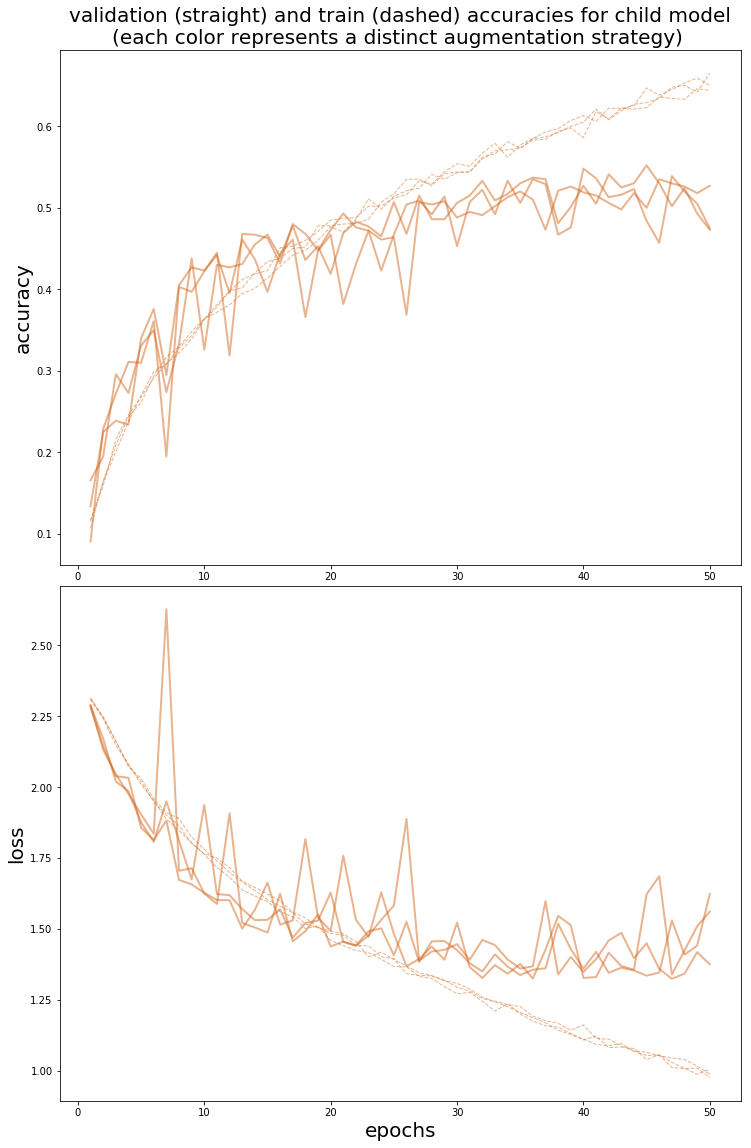

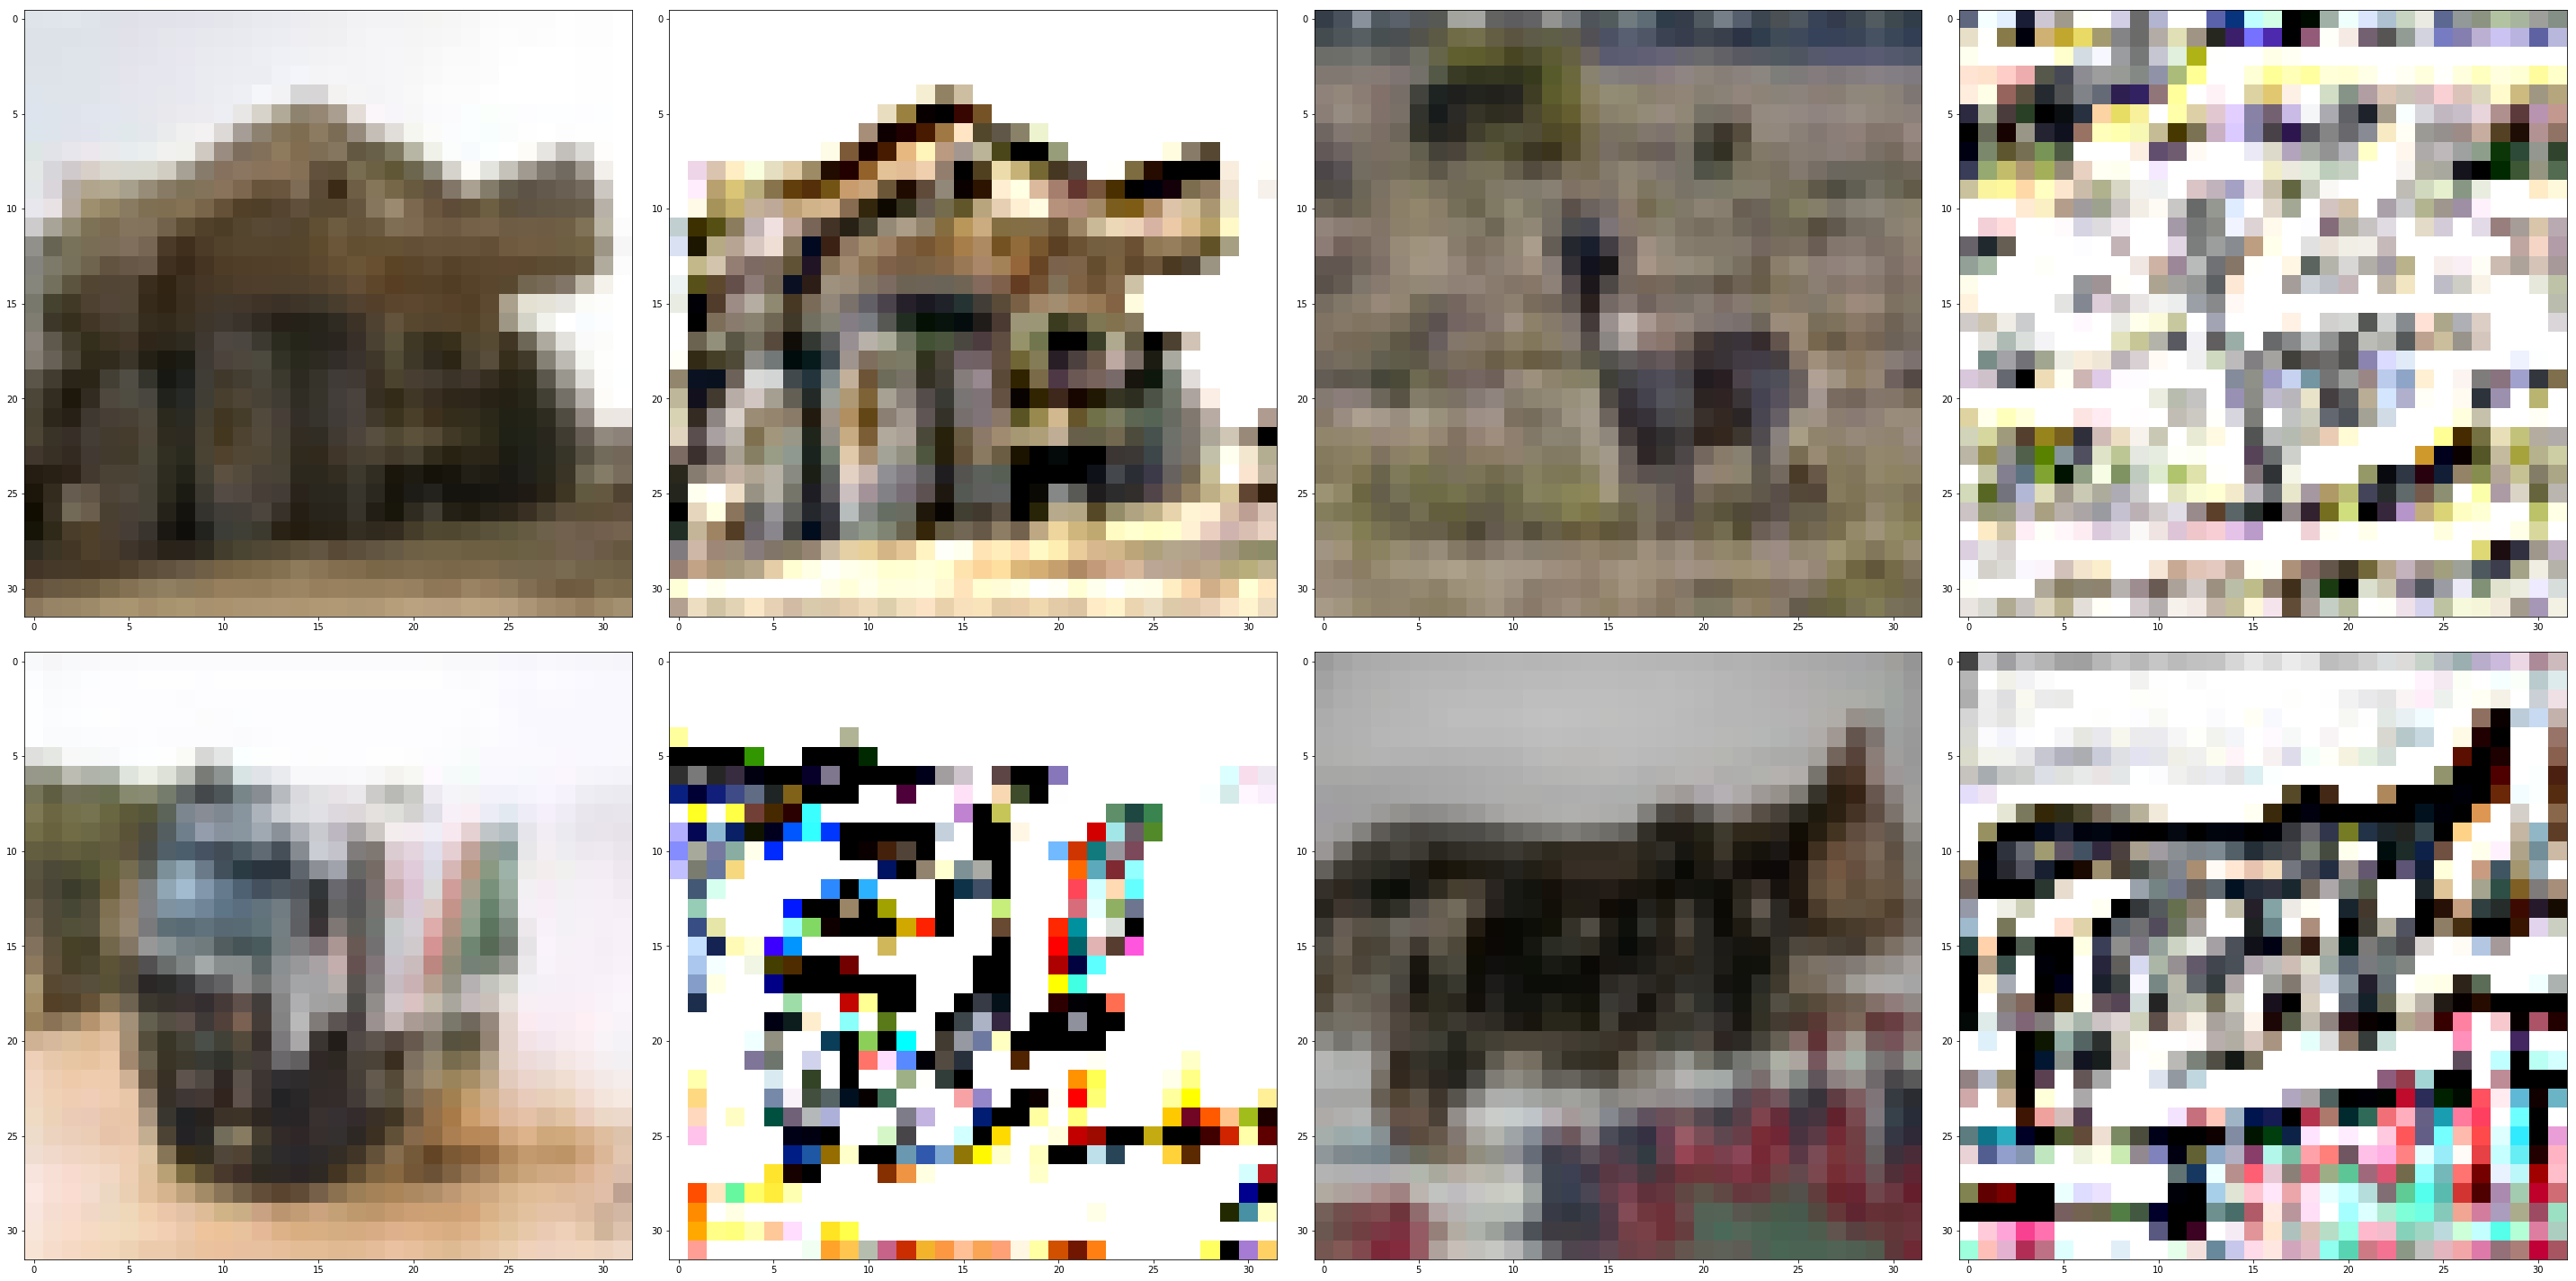

<Figure size 144x144 with 0 Axes>

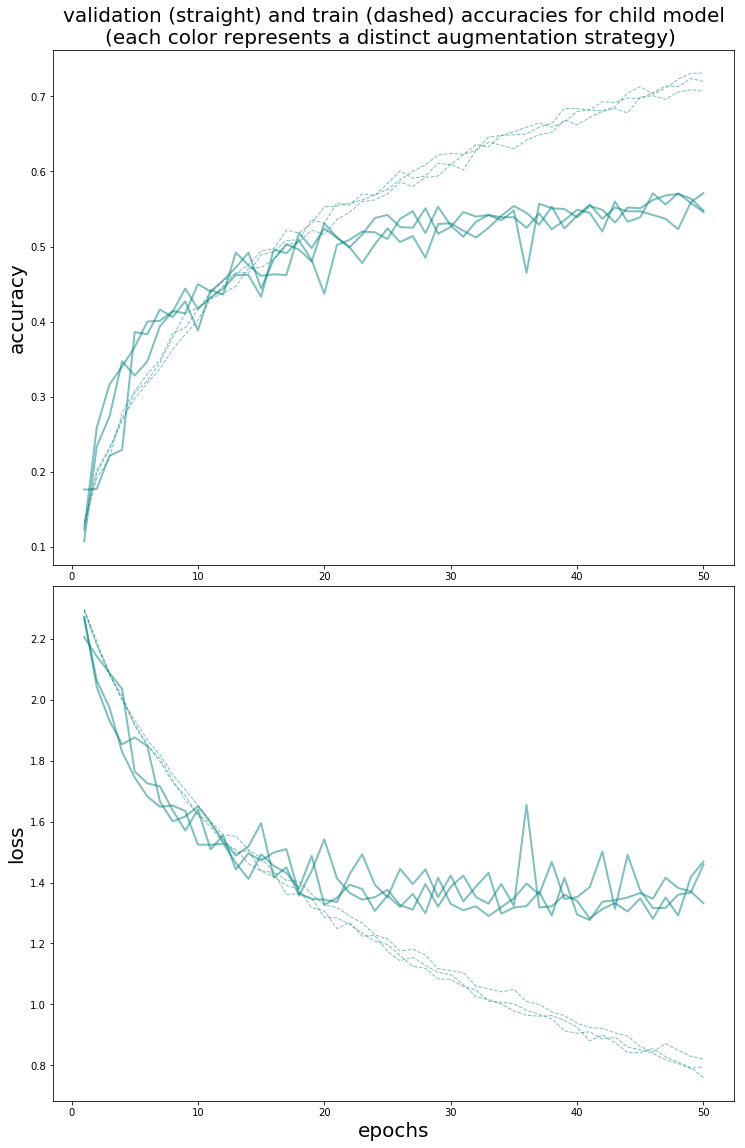

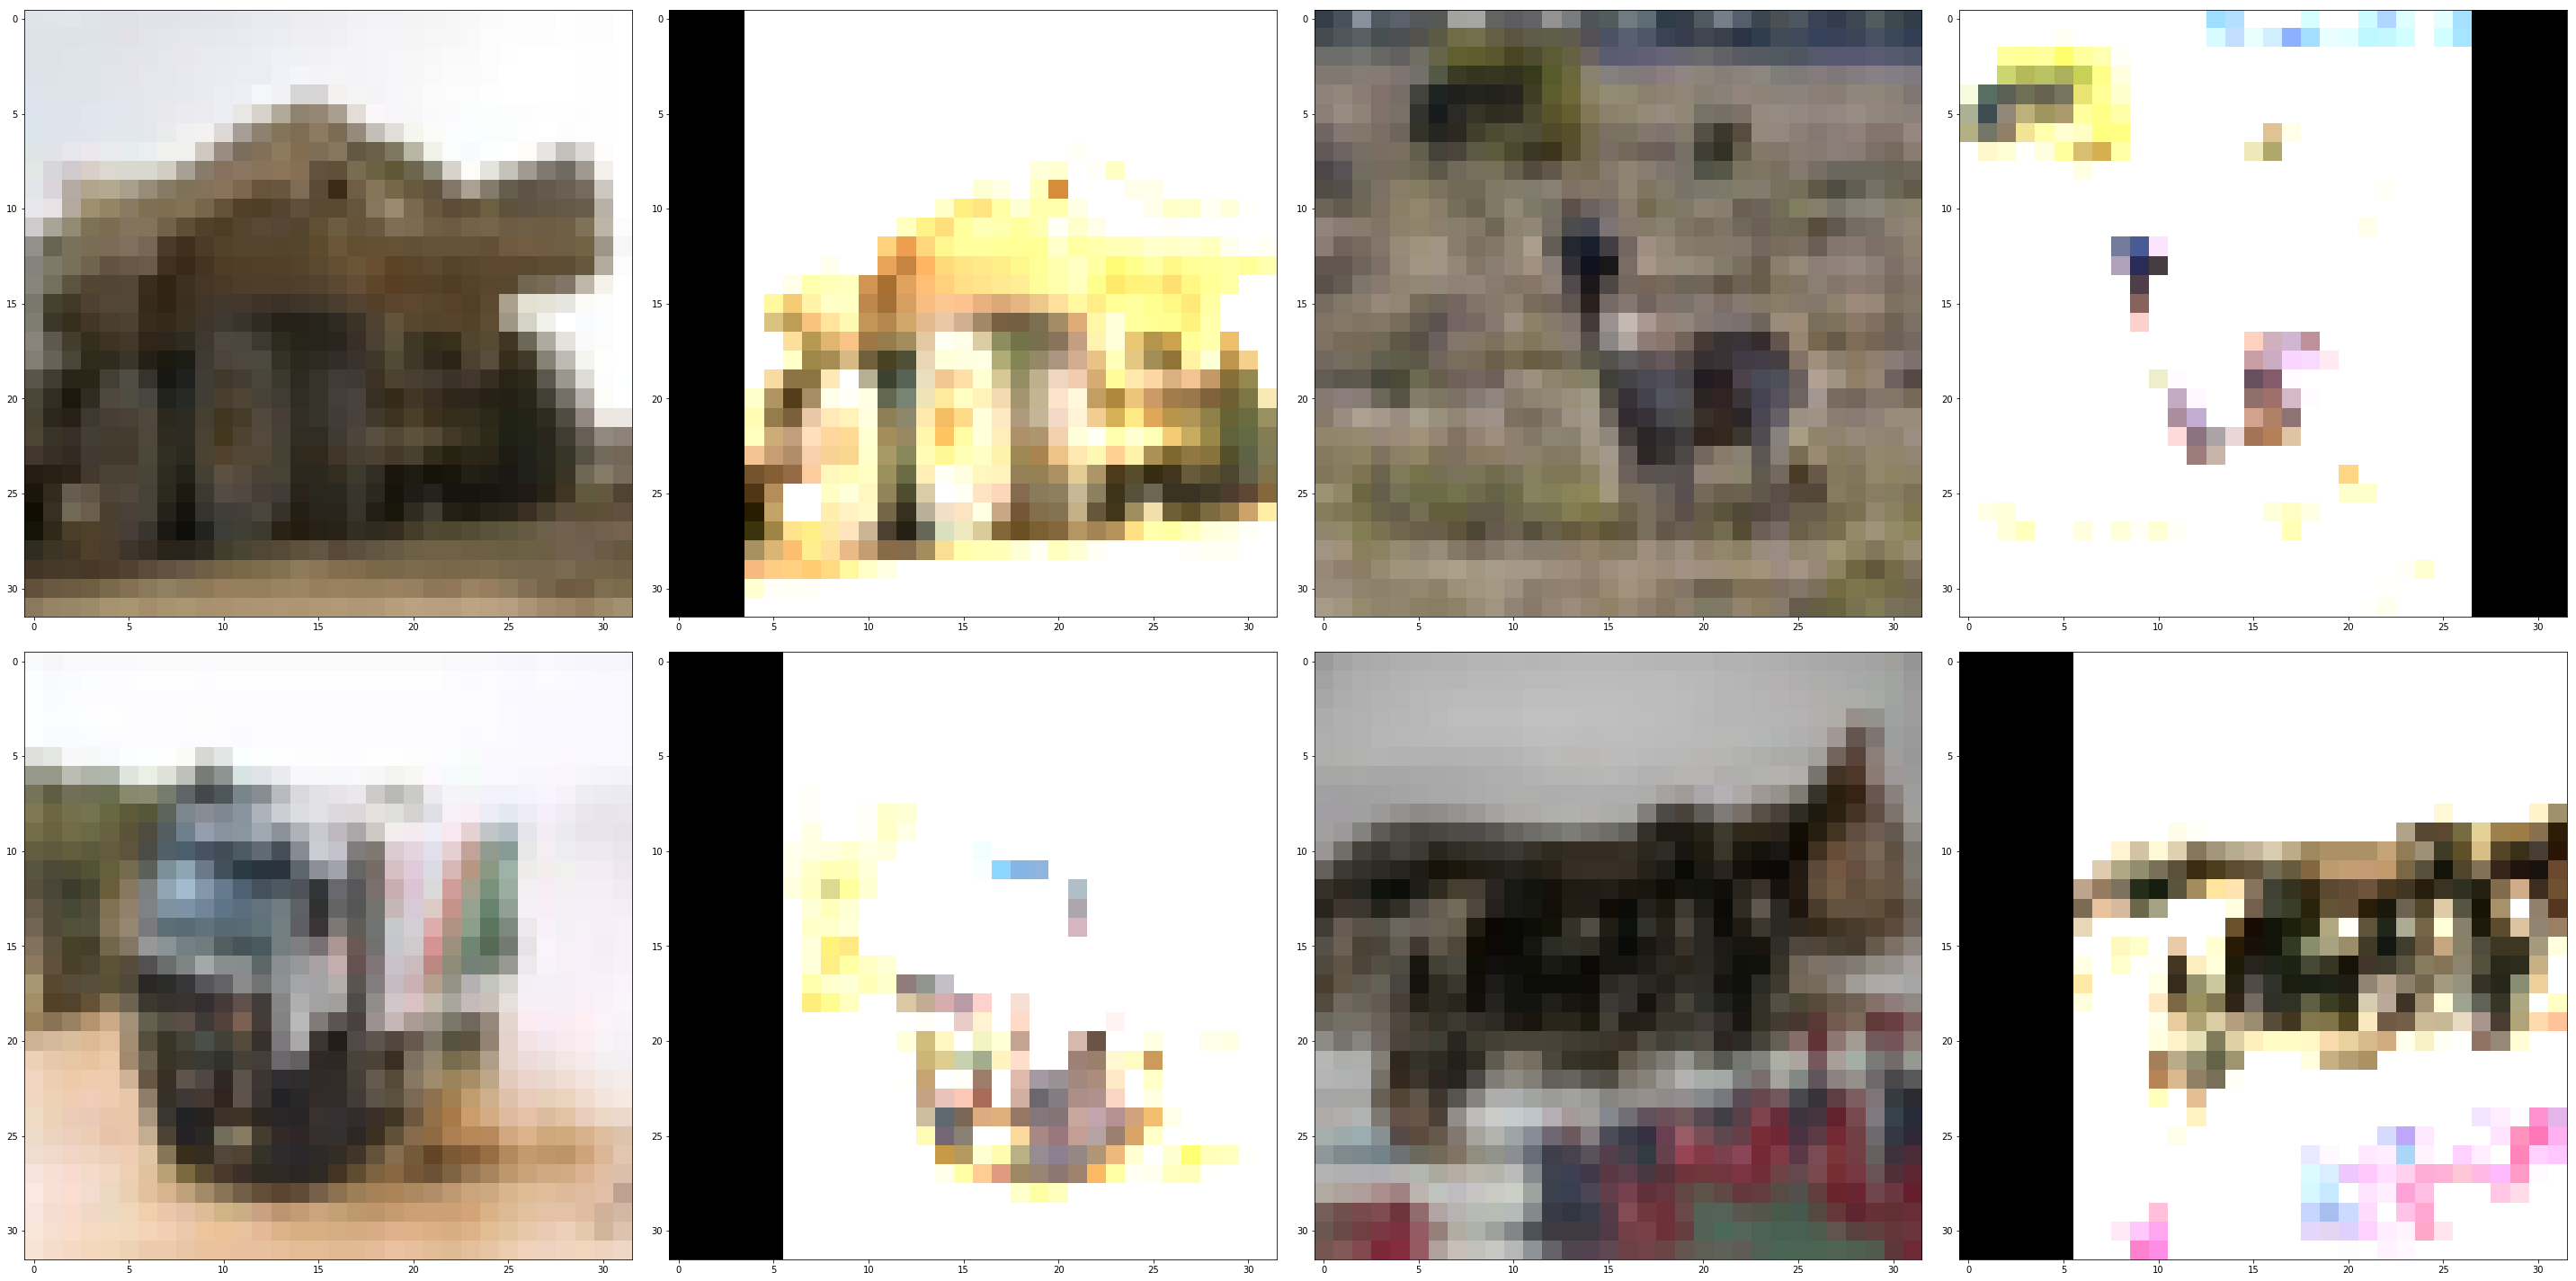

<Figure size 144x144 with 0 Axes>

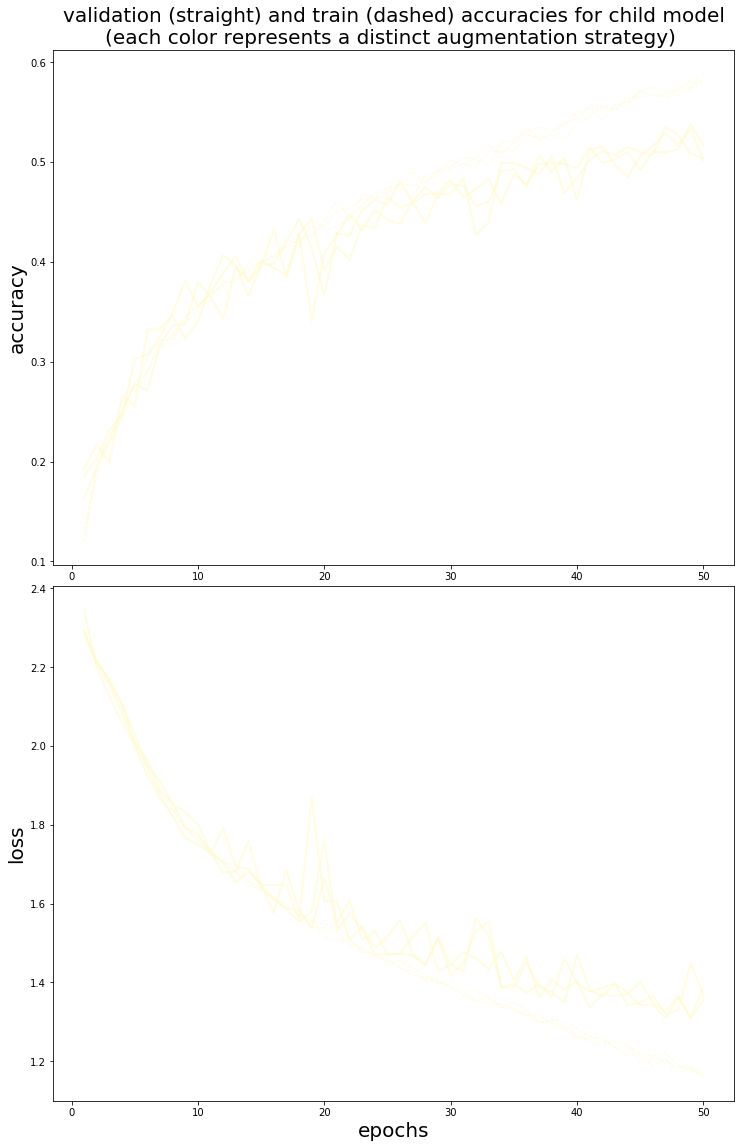

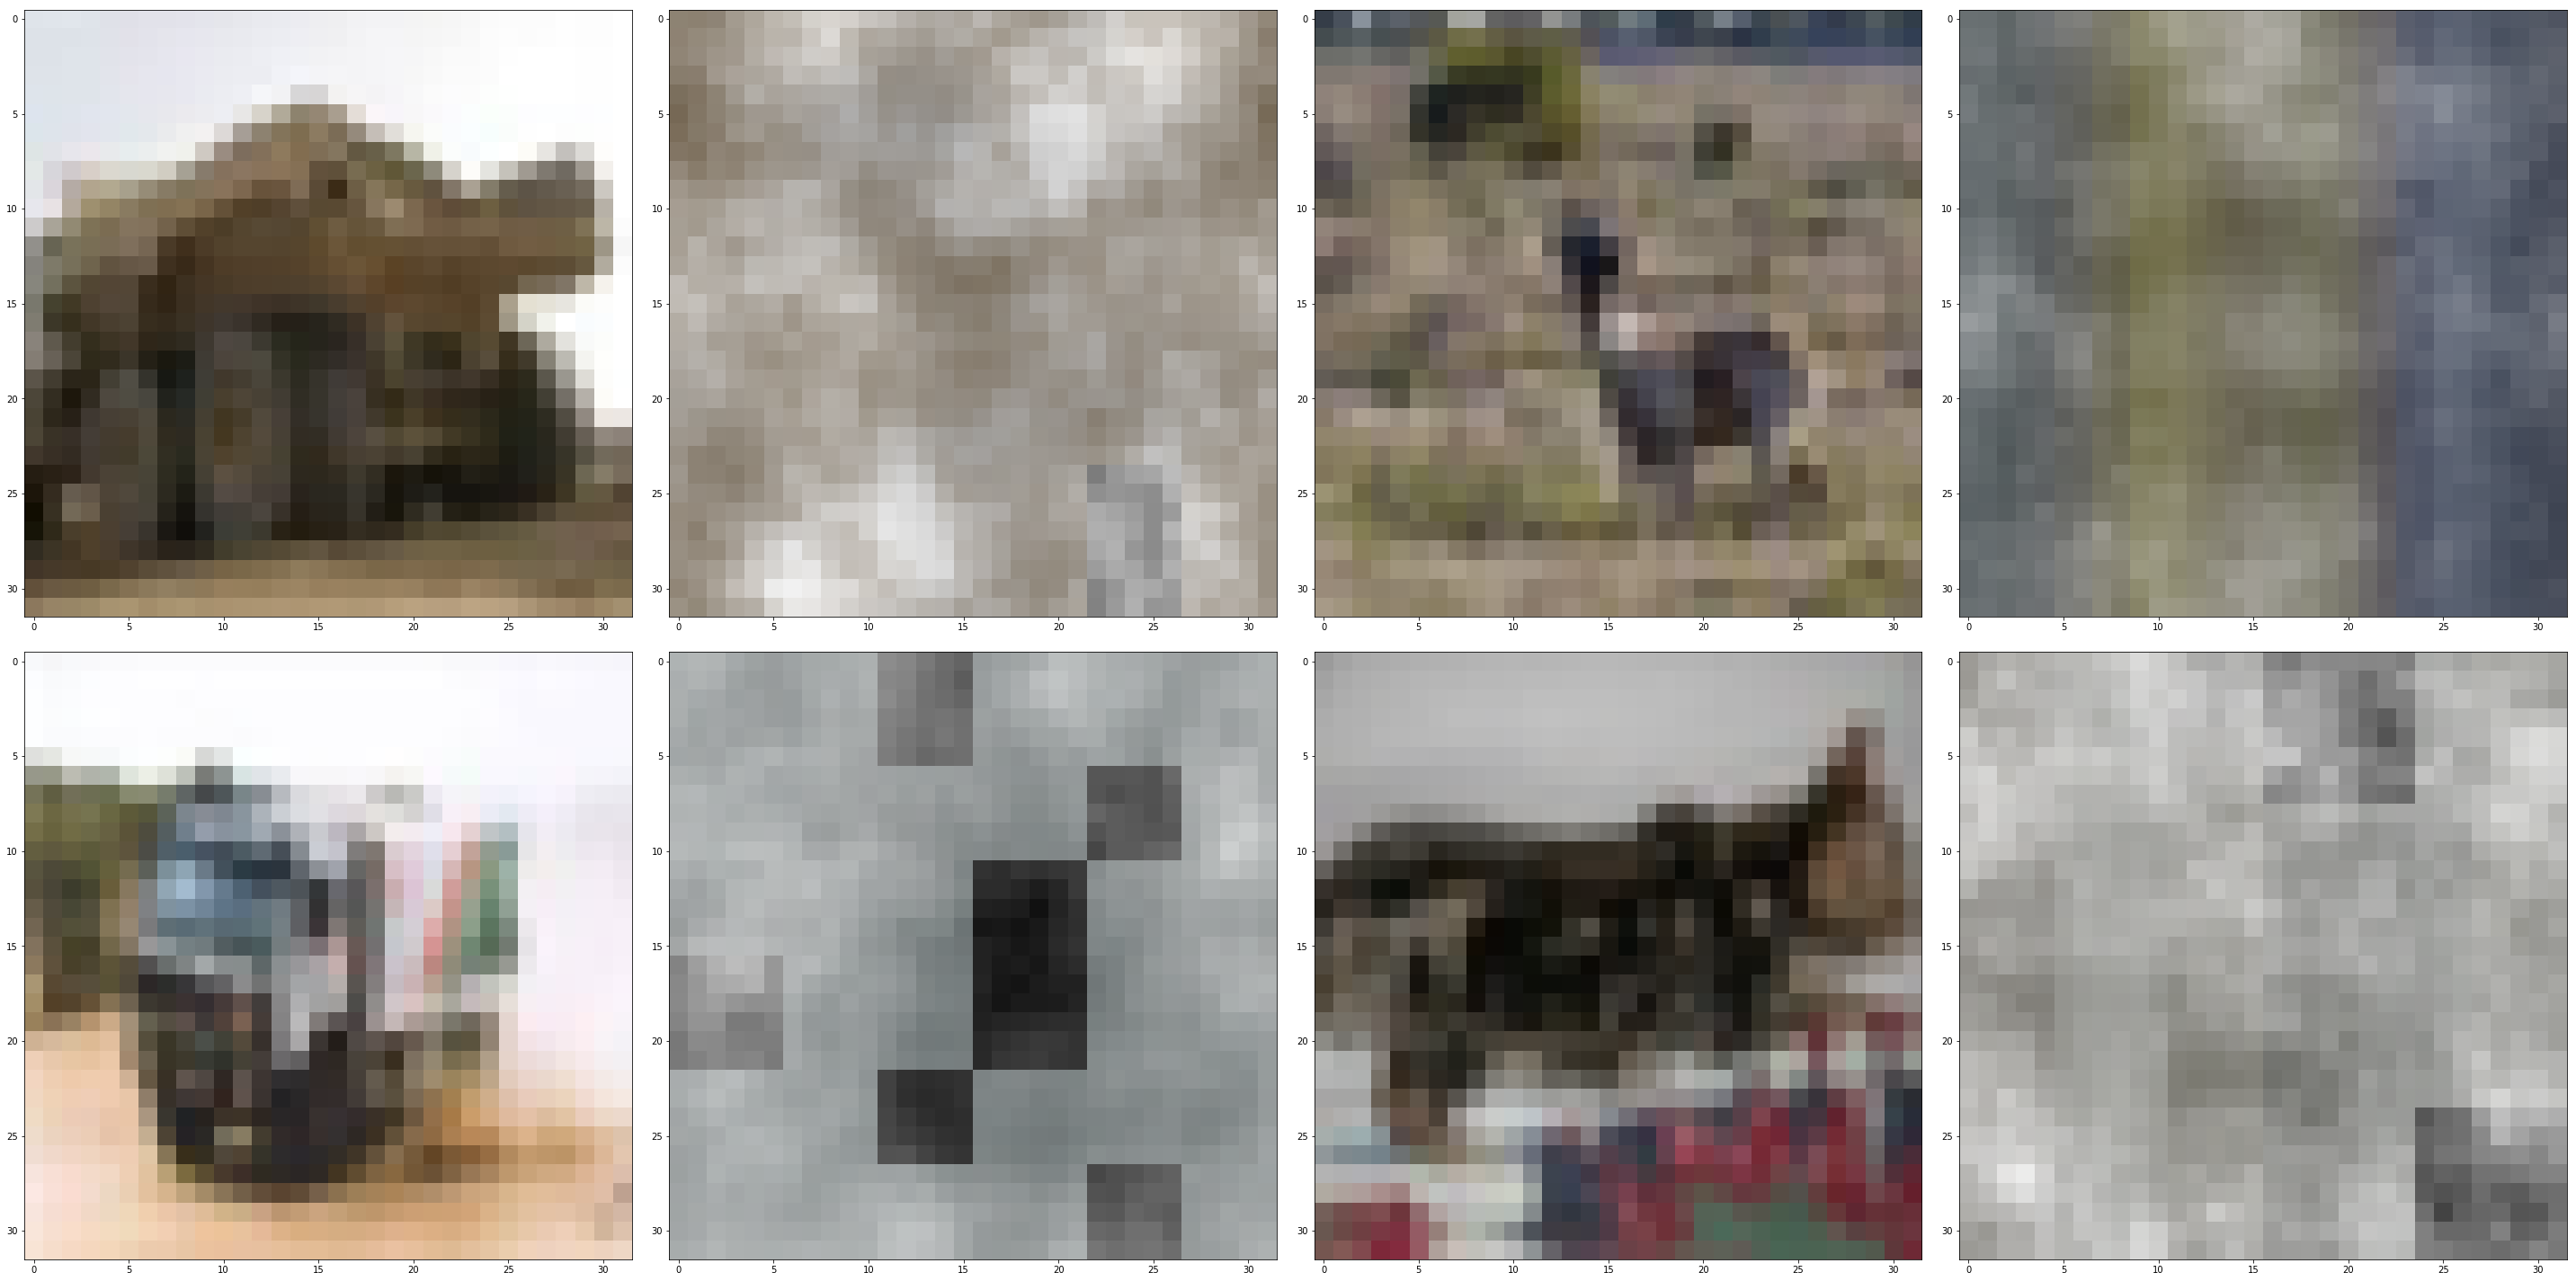

<Figure size 144x144 with 0 Axes>

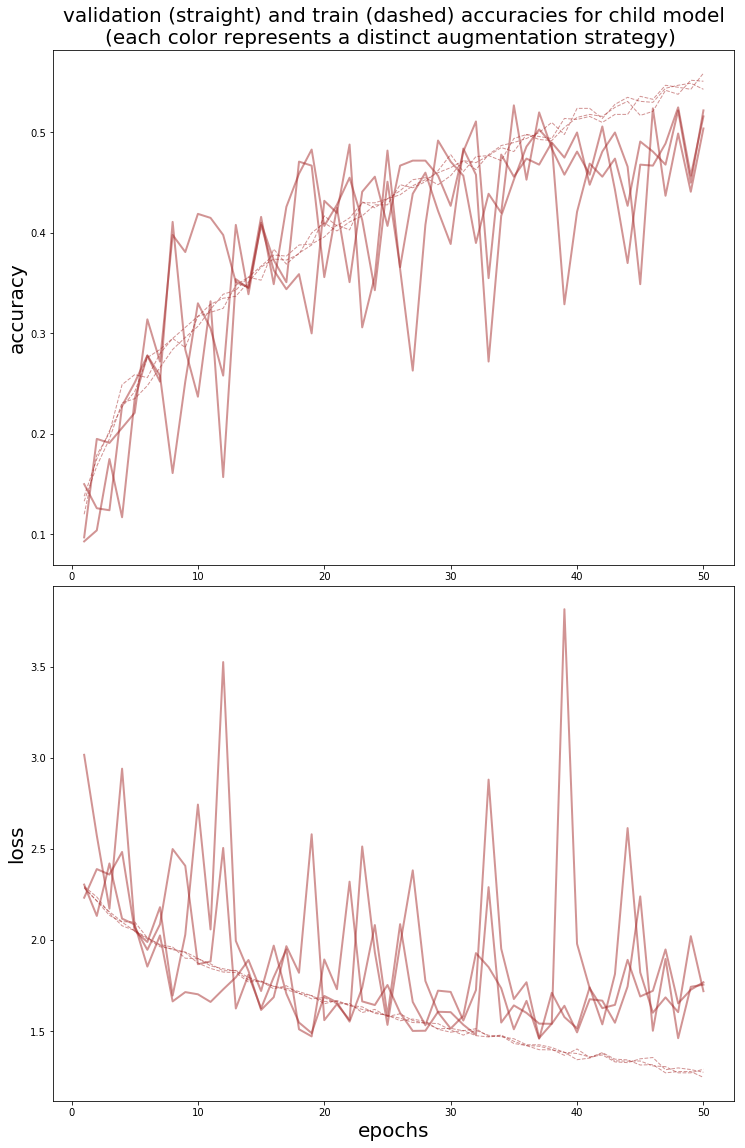

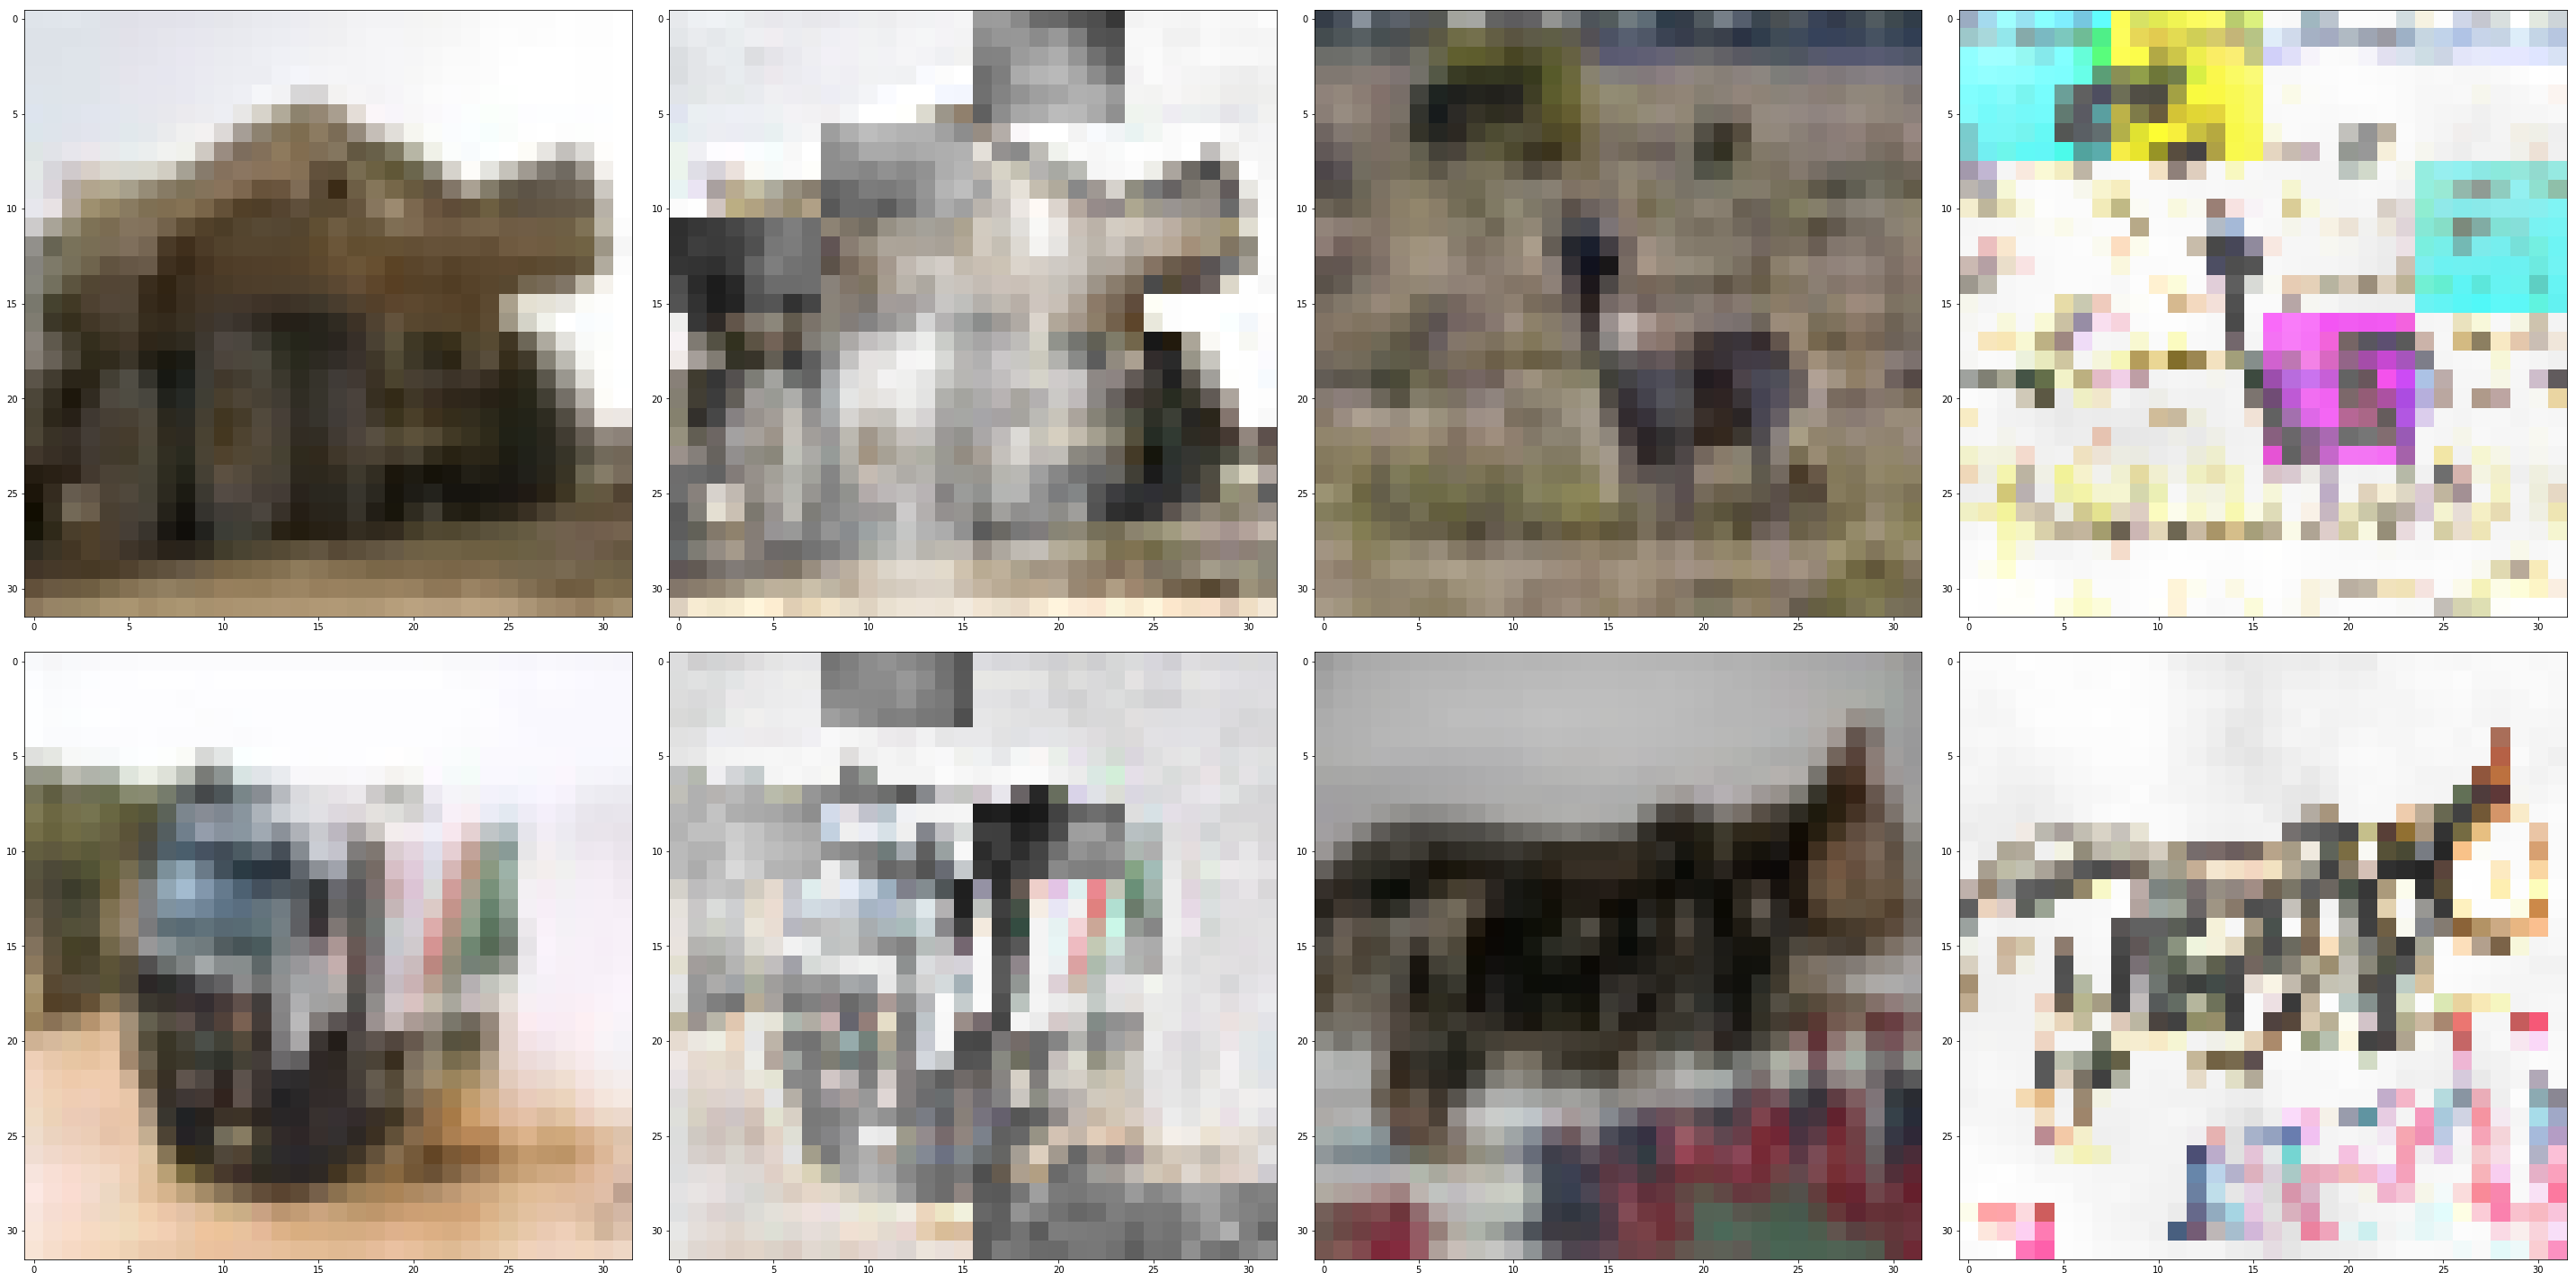

<Figure size 144x144 with 0 Axes>

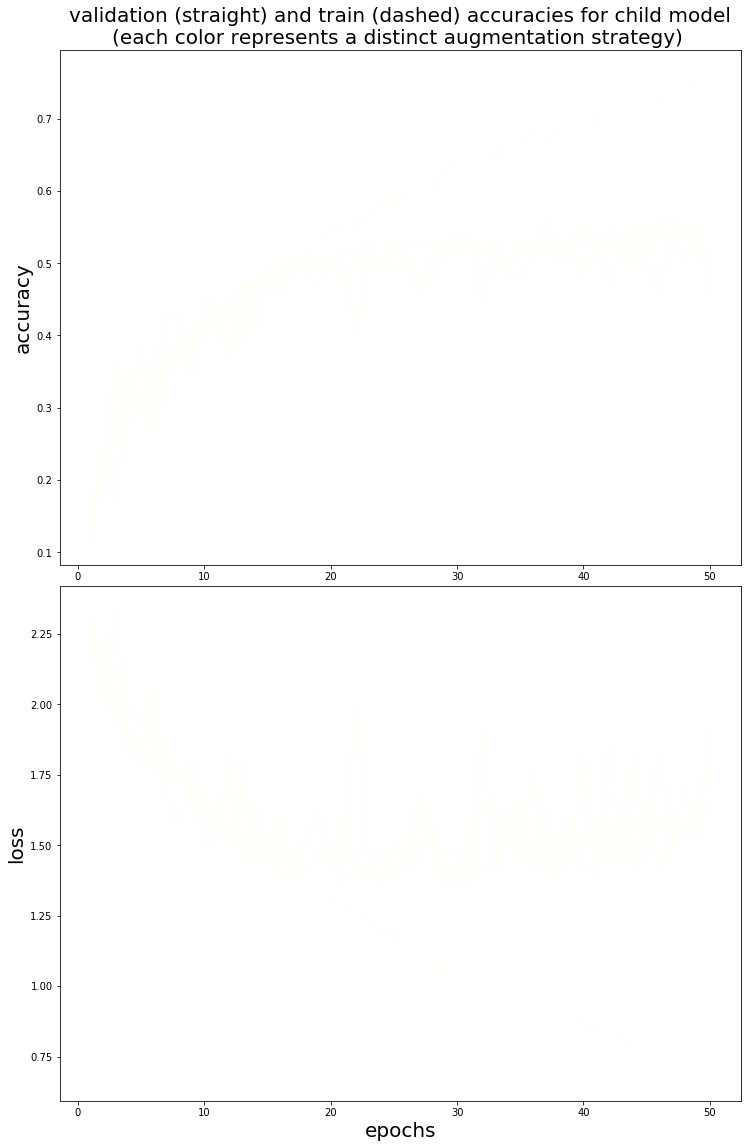

In [54]:
for i in non_overfitting_exp_df.drop_duplicates("trial_no").sort_values("reward", ascending=False).trial_no.values[:5]:
    print ("trial_no:",i)
    display_augmentation_by_trial_no(i, non_overfitting_exp_df, data, nrows=2, ncols=4)
    plt.figure(figsize=(2,2))
    plot_exp_lines(exp_df[exp_df["trial_no"]==i])

In [47]:
non_overfitting_exp_df.drop_duplicates("trial_no").sort_values("reward",ascending=False)[:15]

acc   loss  val_acc  val_loss  trial_no       aug1_type  \
27750  0.116  2.315    0.166     2.288       186  gamma-contrast   
4950   0.131  2.292    0.107     2.273        34          emboss   
60600  0.121  2.347    0.163     2.293       405  gamma-contrast   
3150   0.133  2.289    0.150     2.232        22            crop   
3000   0.141  2.282    0.115     2.313        21         sharpen   
8100   0.128  2.294    0.165     2.198        55  coarse-dropout   
13650  0.144  2.256    0.163     2.168        92         dropout   
1800   0.144  2.277    0.211     2.192        13          emboss   
3900   0.164  2.242    0.226     2.080        27         dropout   
11700  0.132  2.294    0.151     2.197        79          clouds   
6150   0.130  2.295    0.129     2.196        42         dropout   
13050  0.105  2.389    0.047     2.304        88          invert   
8550   0.138  2.278    0.187     2.139        58  coarse-dropout   
43350  0.120  2.298    0.153     2.272       290  gamma-contrast   
600    0.130  2.292    0.188     2.194         5   gaussian-blur   

       aug1_magnitude       aug2_type  aug2_magnitude       aug3_type  \
27750           0.981         sharpen           0.619          clouds   
4950            0.986          clouds           0.583         sharpen   
60600           0.470  gamma-contrast           0.700     translate-x   
3150            0.990  coarse-dropout           0.248          clouds   
3000            0.972  coarse-dropout           0.197          clouds   
8100            0.977             fog           0.582         sharpen   
13650           0.979          emboss           0.612         dropout   
1800            0.331  coarse-dropout           0.916          rotate   
3900            0.391           shear           0.449        brighten   
11700           0.977          emboss           0.719          clouds   
6150            0.983  gamma-contrast           0.637        brighten   
13050           0.900          clouds           0.057  gamma-contrast   
8550            0.974          clouds           0.150   gaussian-blur   
43350           0.399     translate-x           0.102           shear   
600             0.474          rotate           0.737           shear   

       aug3_magnitude  portion  sample_no  reward  epoch  acc_overfit  \
27750           0.598    0.930          1   0.535    0.0       -0.050   
4950            0.513    0.981          1   0.529    0.0        0.024   
60600           0.372    0.972          1   0.526    0.0       -0.042   
3150            0.708    0.633          1   0.524    0.0       -0.017   
3000            0.760    0.865          1   0.523    0.0        0.026   
8100            0.028    0.963          1   0.522    0.0       -0.037   
13650           0.097    0.982          1   0.521    0.0       -0.019   
1800            0.881    0.695          1   0.521    0.0       -0.067   
3900            0.956    0.979          1   0.520    0.0       -0.062   
11700           0.722    0.966          1   0.520    0.0       -0.019   
6150            0.399    0.984          1   0.518    0.0        0.001   
13050           0.731    0.978          1   0.517    0.0        0.058   
8550            0.484    0.972          1   0.516    0.0       -0.049   
43350           0.118    0.563          1   0.515    0.0       -0.033   
600             0.135    0.324          1   0.515    0.0       -0.058   

       total_acc_overfit  
27750              0.520  
4950               2.690  
60600              1.037  
3150               1.070  
3000               5.120  
8100               0.266  
13650              5.722  
1800               0.237  
3900               6.074  
11700              0.214  
6150               3.721  
13050              0.430  
8550               0.283  
43350              0.673  
600                3.336

# Top-3 nonoverfitting policies curves

trial_no       aug1_type  aug1_magnitude       aug2_type  aug2_magnitude  \
1       186  gamma-contrast           0.981         sharpen           0.619   
0        34          emboss           0.986          clouds           0.583   
2       405  gamma-contrast           0.470  gamma-contrast           0.700   

     aug3_type  aug3_magnitude  portion  reward  
1       clouds           0.598    0.930   0.535  
0      sharpen           0.513    0.981   0.529  
2  translate-x           0.372    0.972   0.526

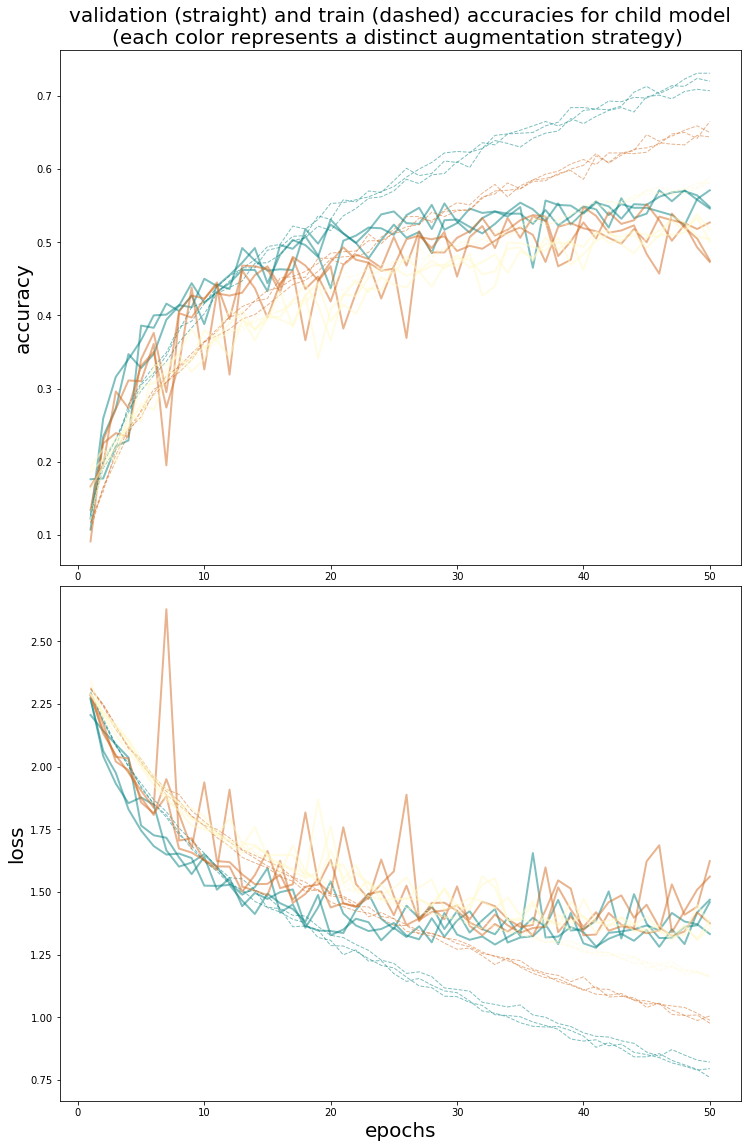

In [48]:
top3_non_overfitting = (non_overfitting_exp_df.drop_duplicates("trial_no")
                            .sort_values("reward",ascending=False)["trial_no"]
                            .values[:3]
                       )

plot_exp_lines(non_overfitting_exp_df[non_overfitting_exp_df["trial_no"].isin(top3_non_overfitting)])